C:\Users\enzob\anaconda3\Lib\site-packages\pandas\plotting\_matplotlib\core.py:580: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = self.plt.figure(figsize=self.figsize)


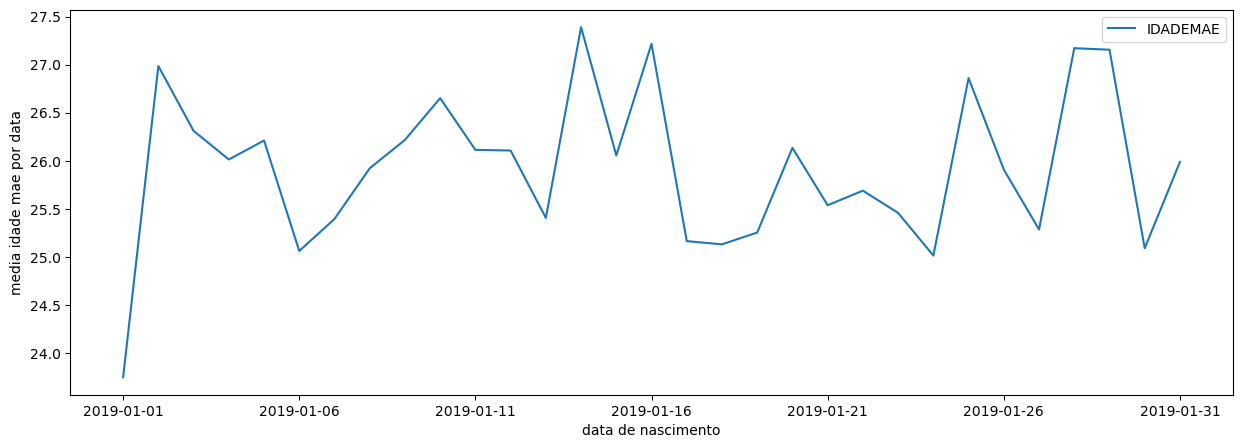

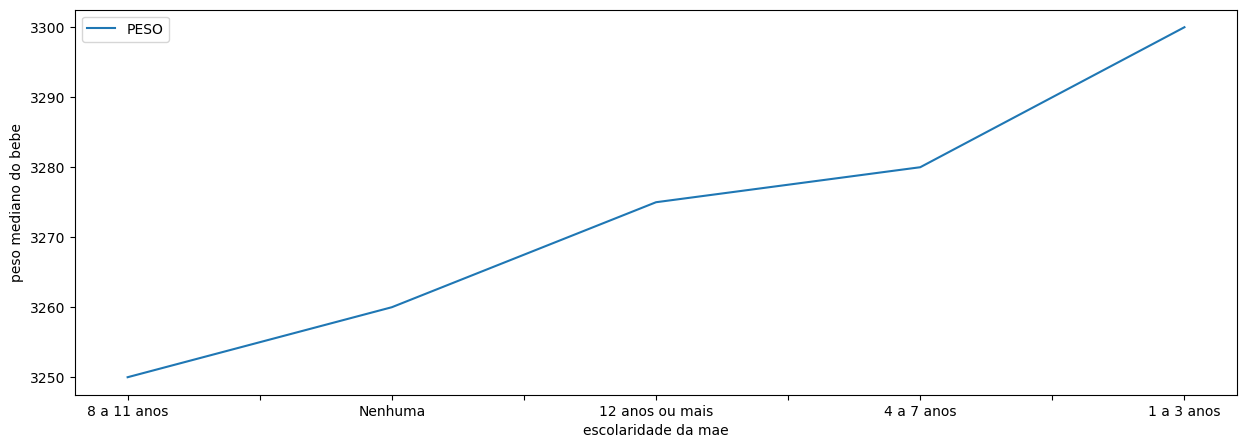

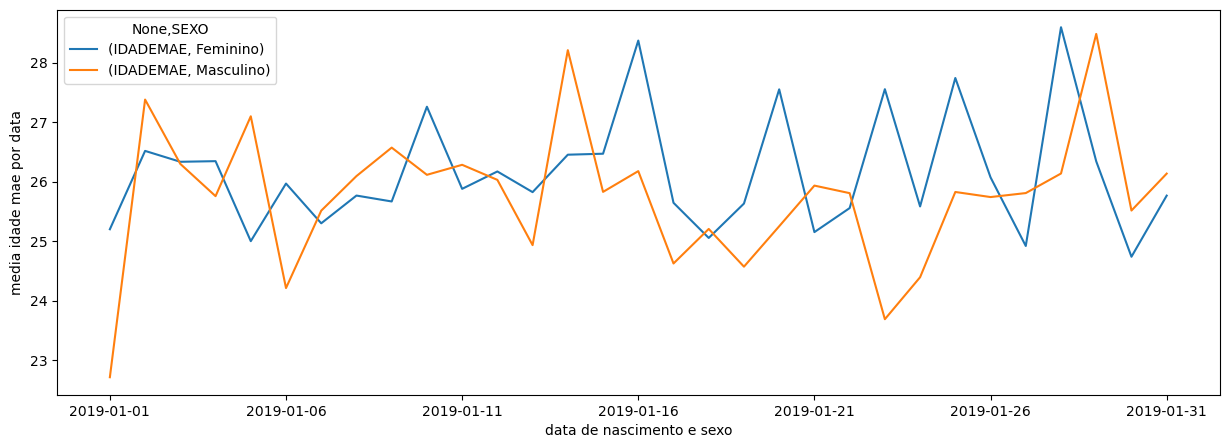

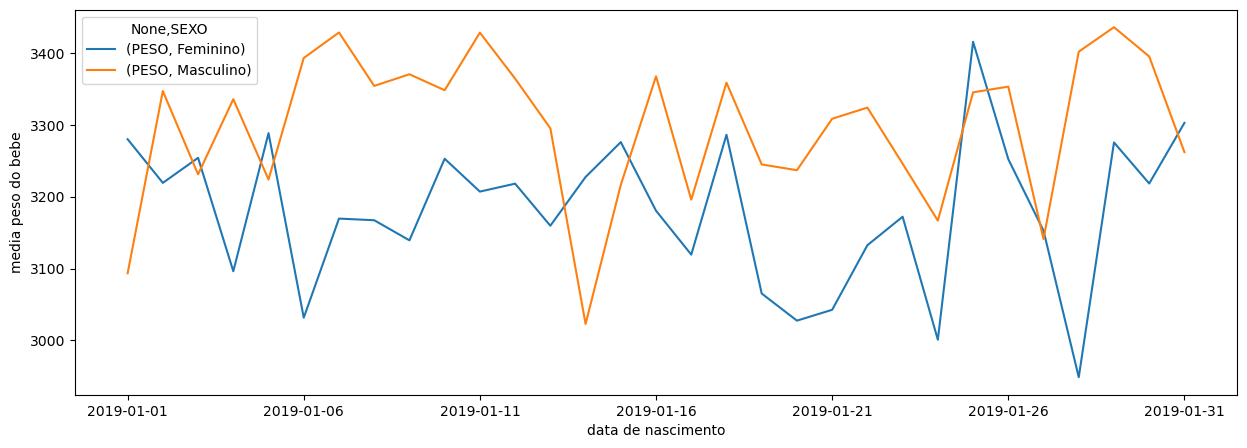

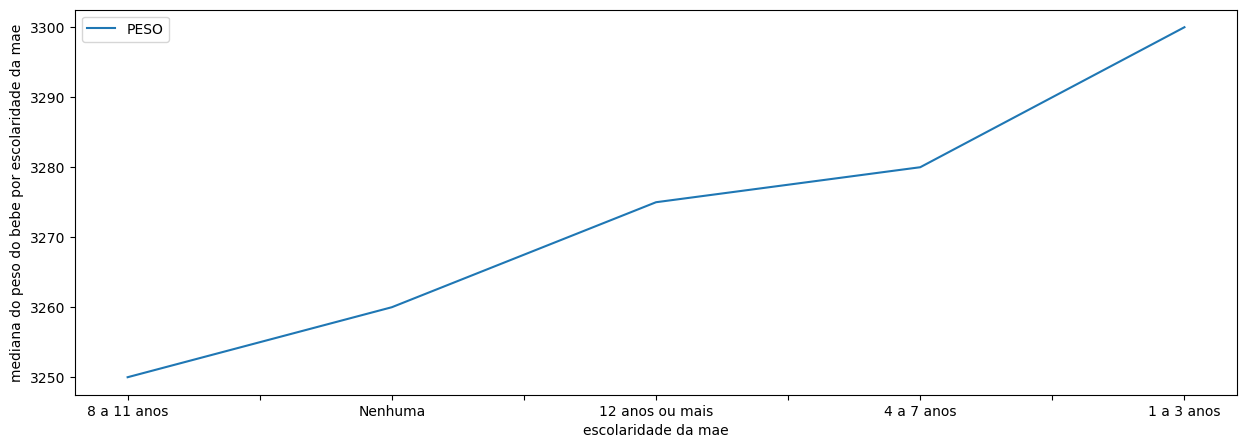

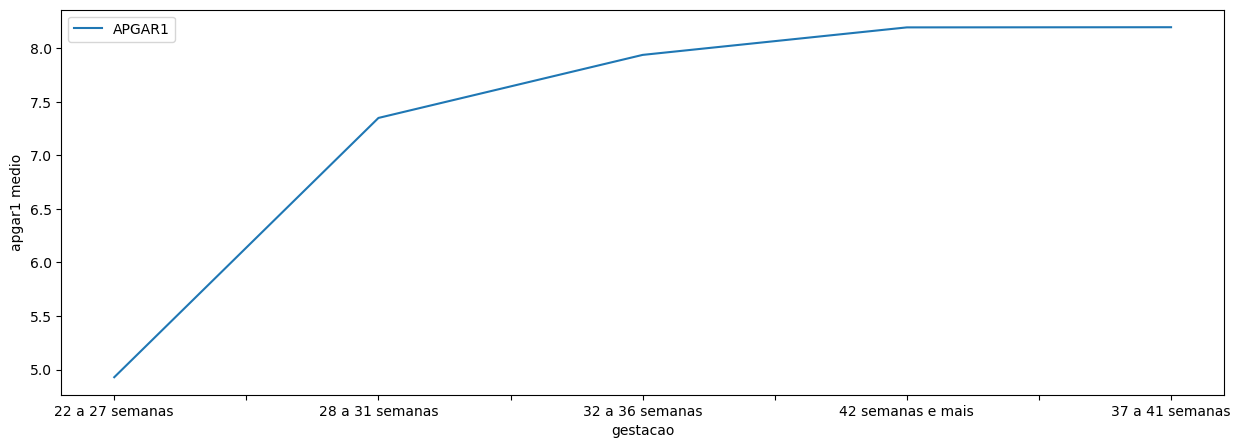

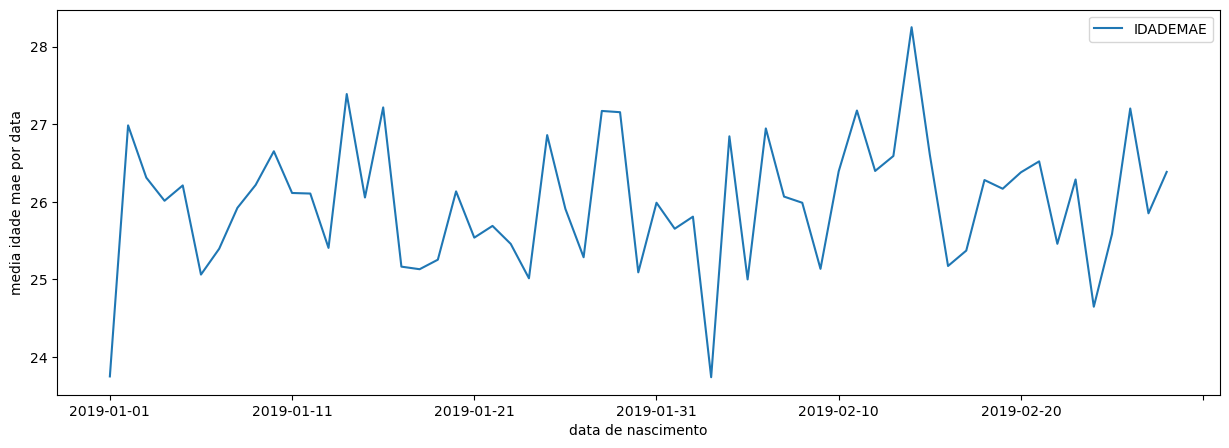

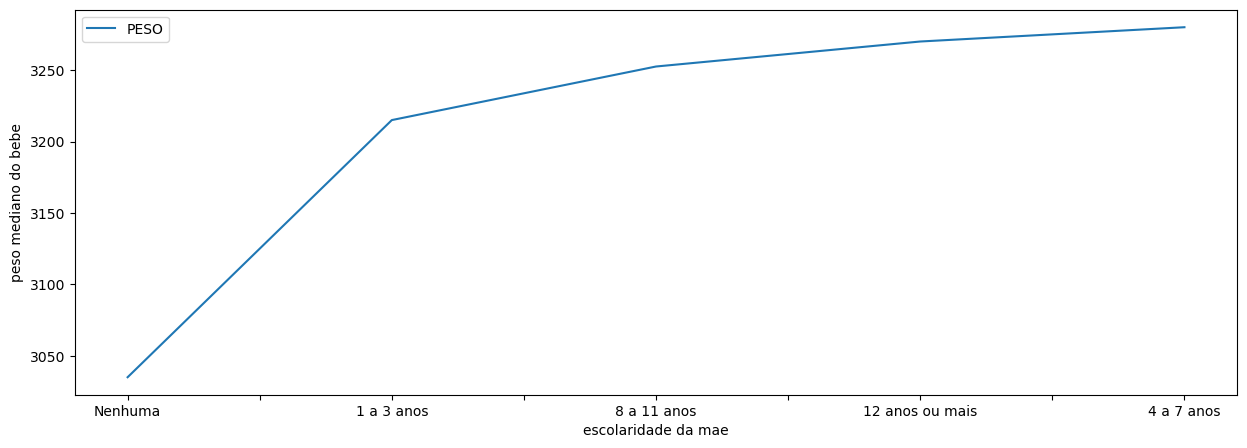

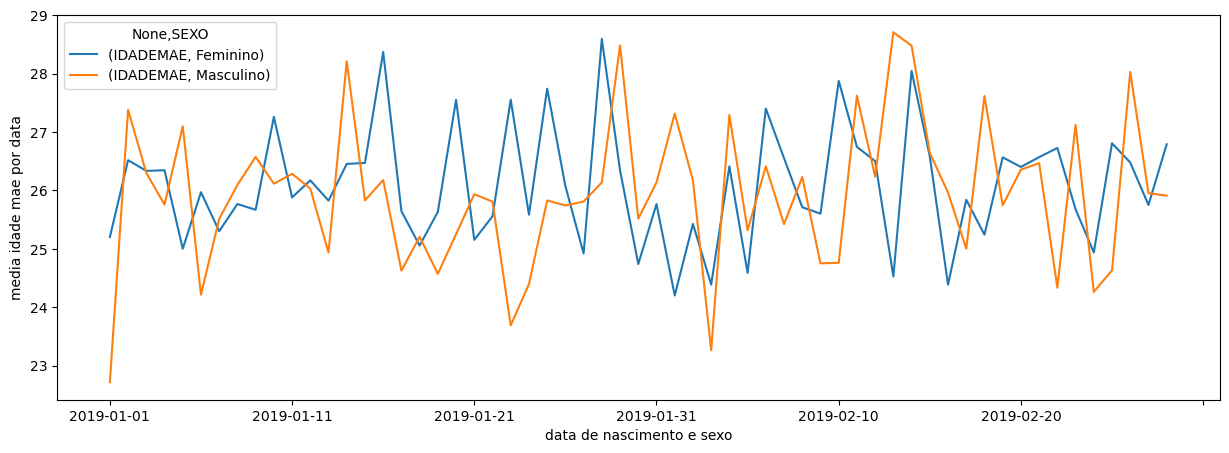

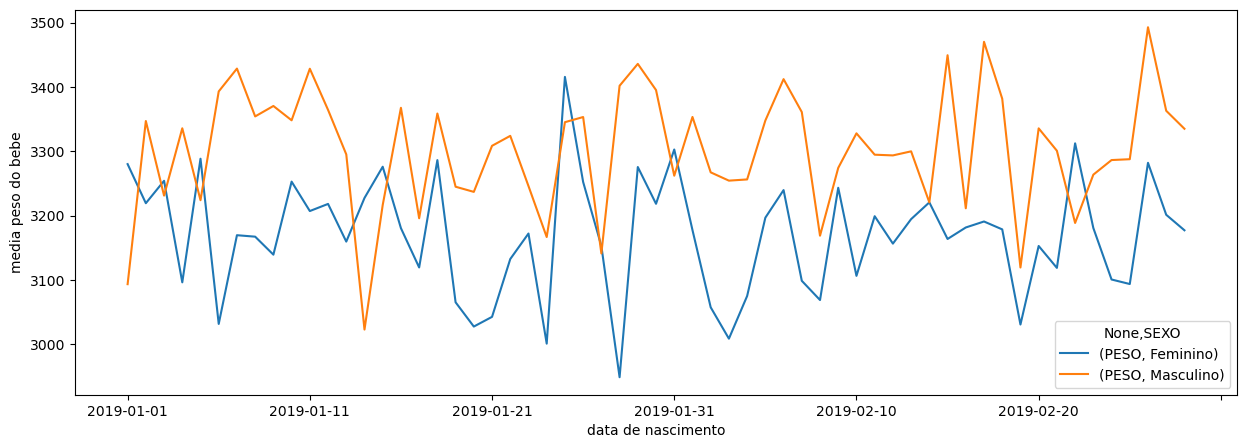

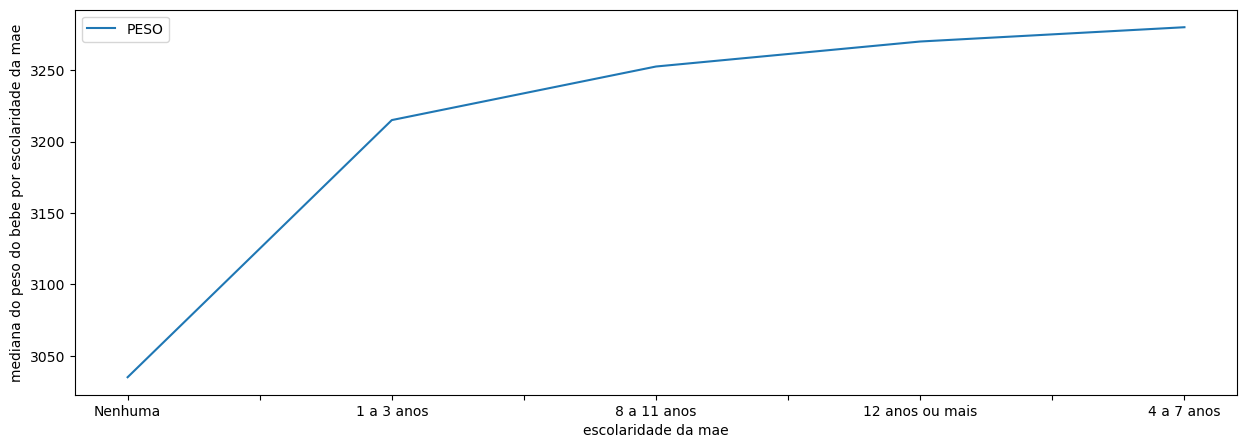

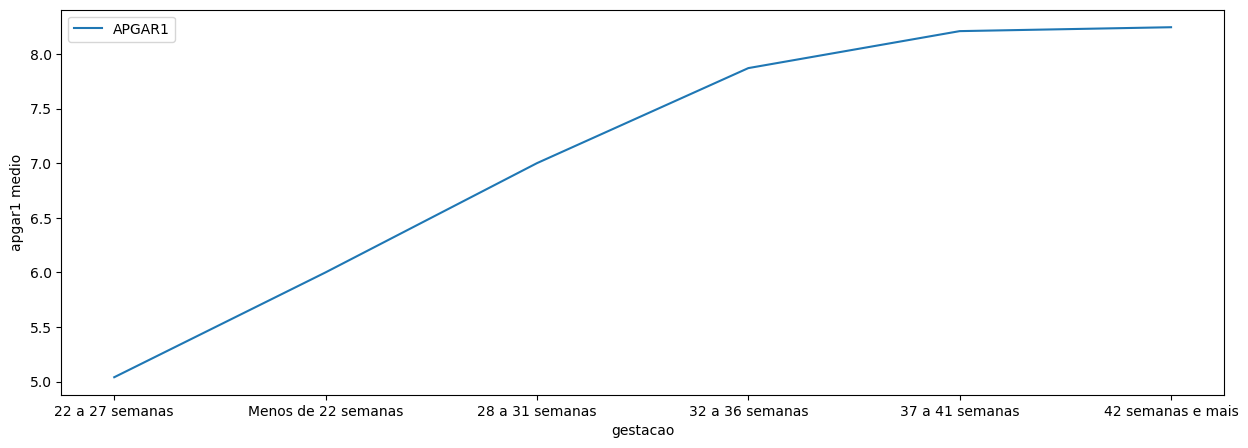

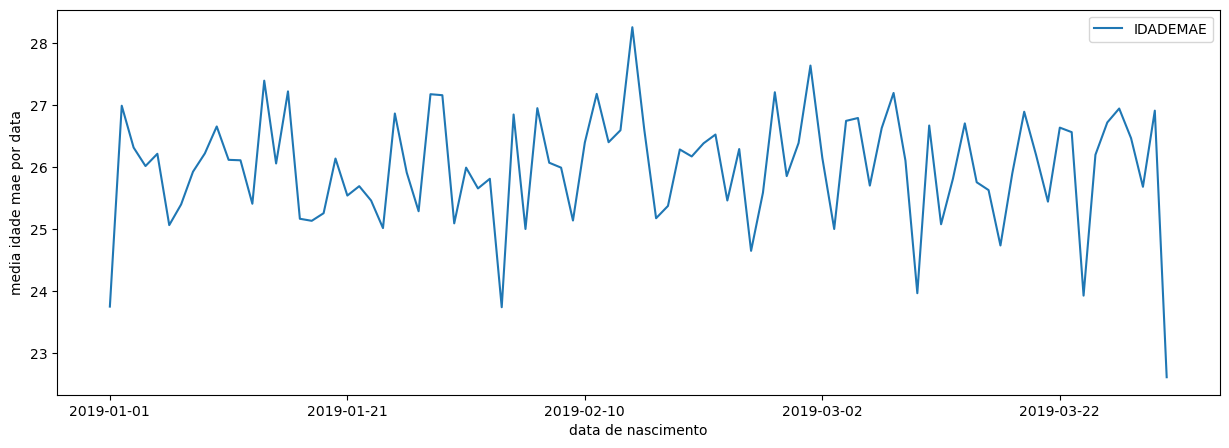

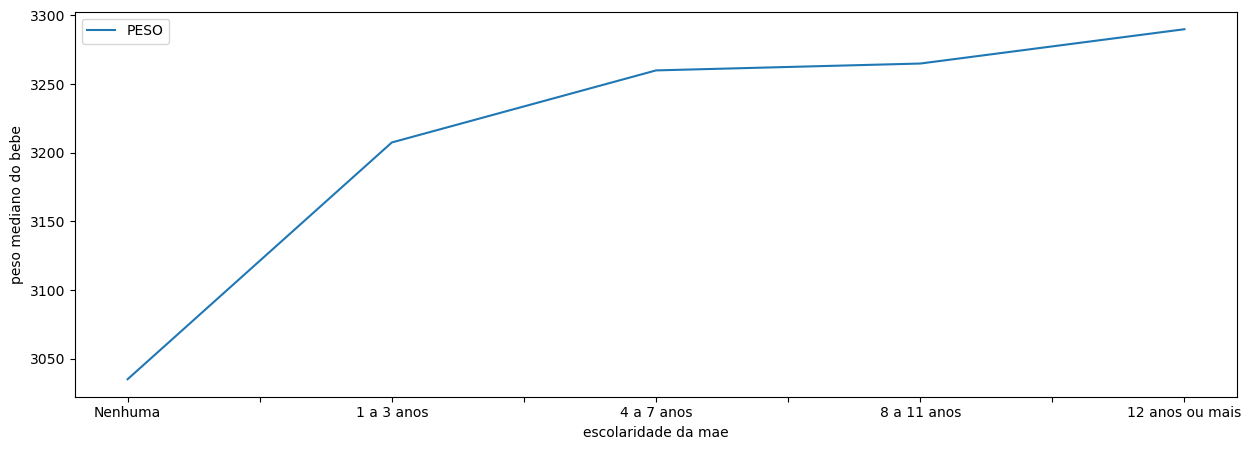

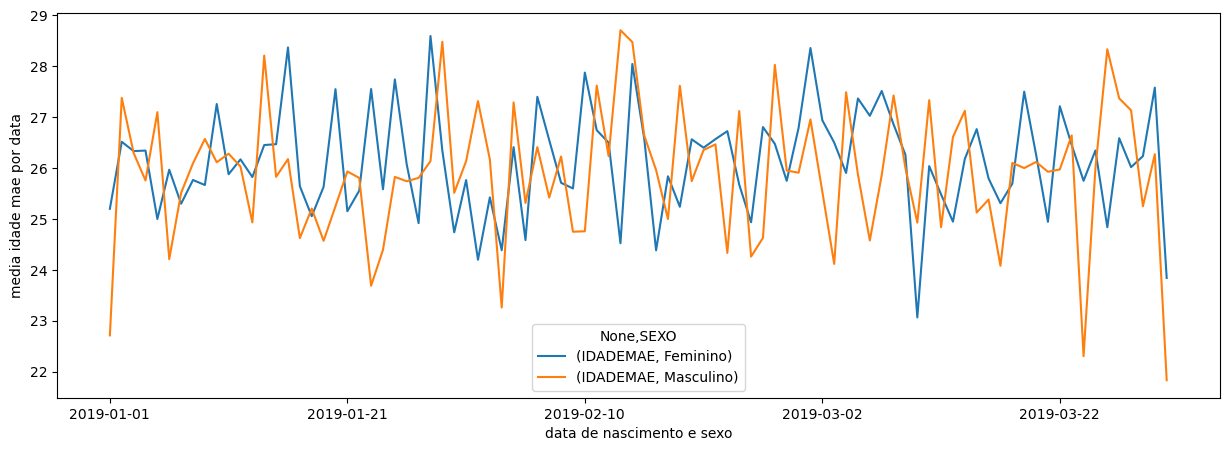

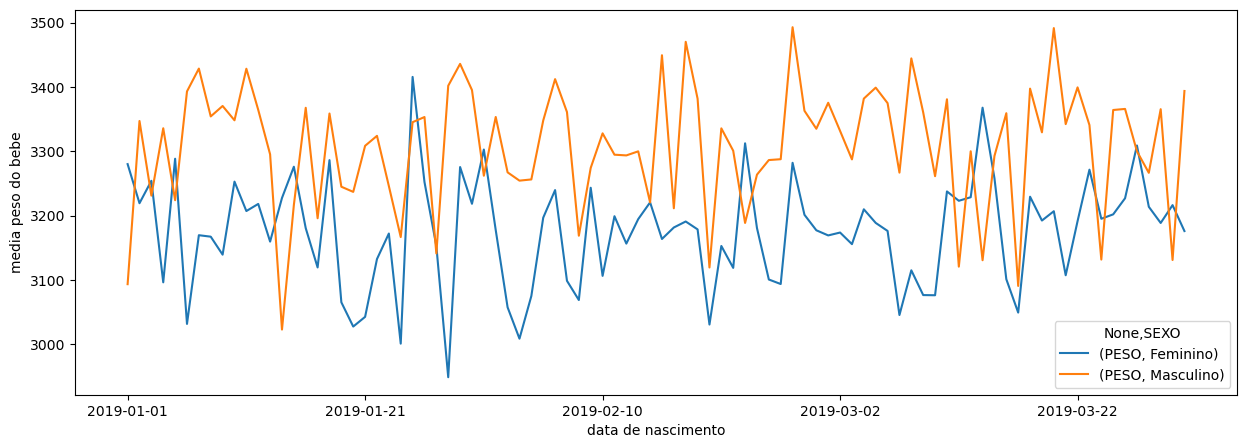

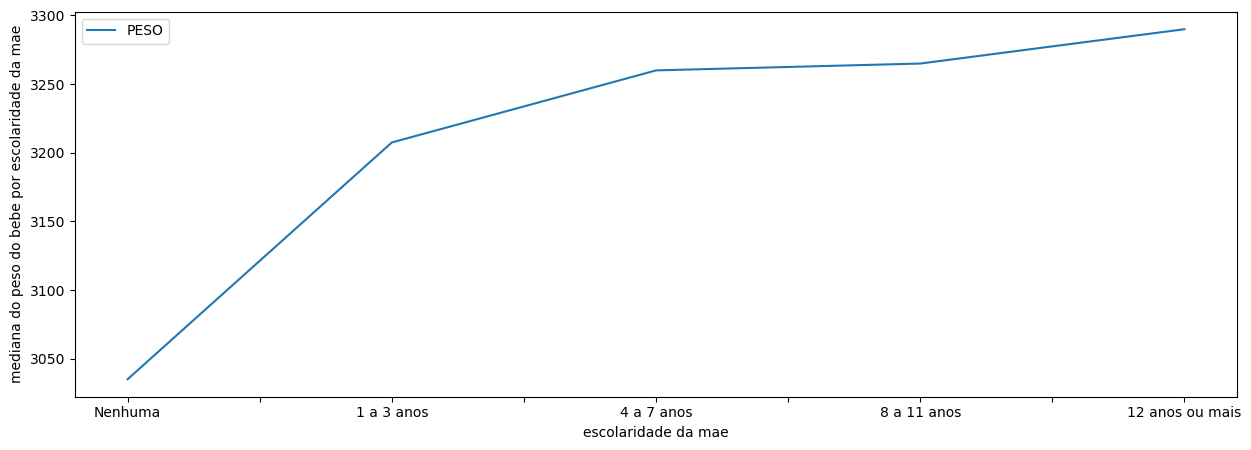

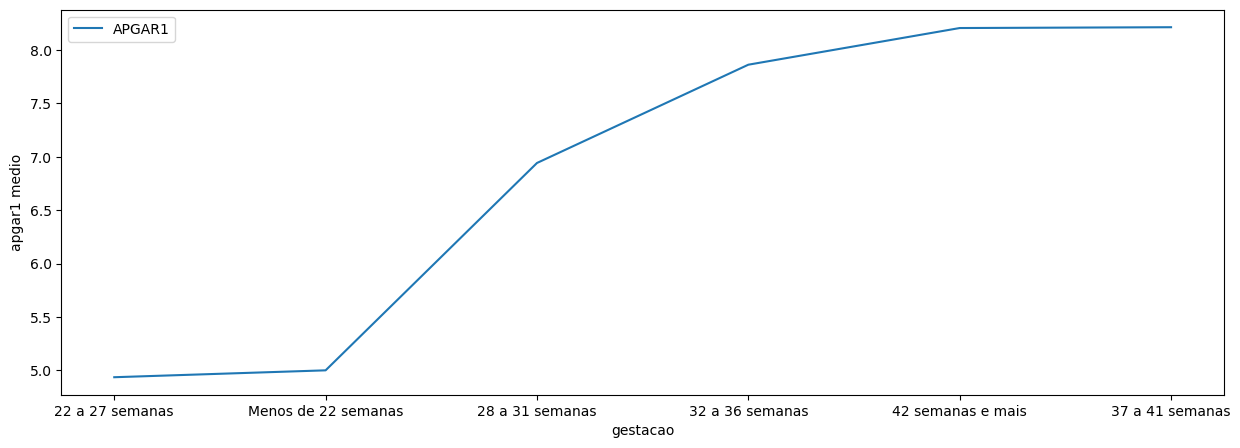

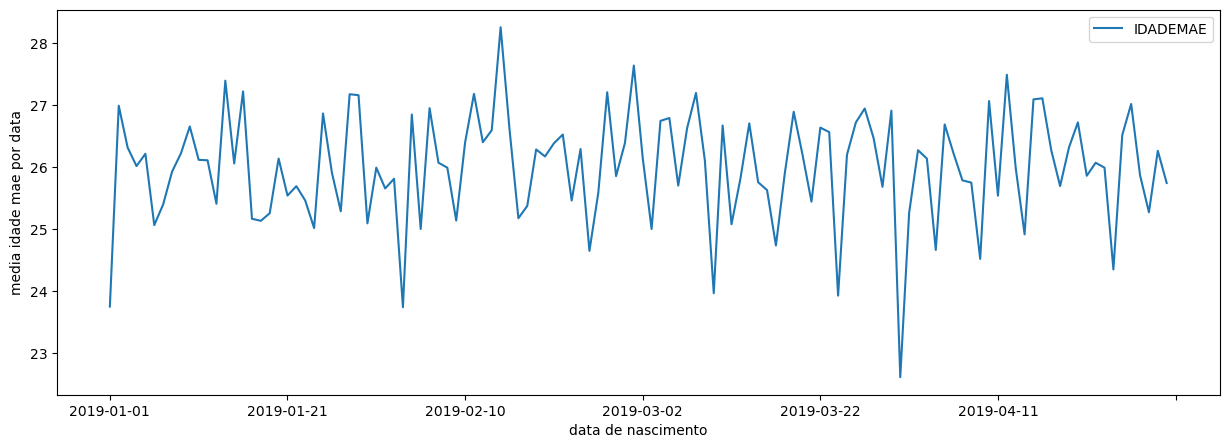

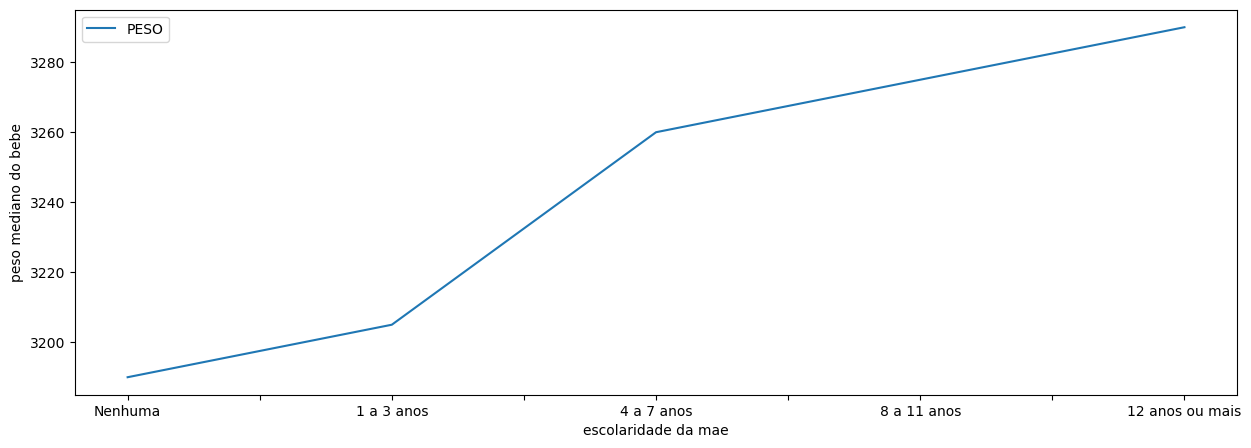

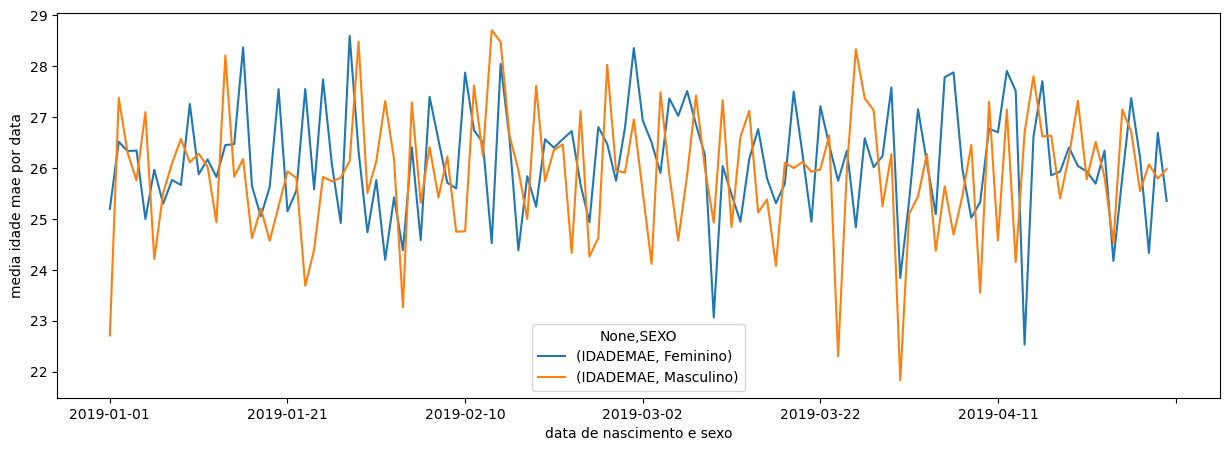

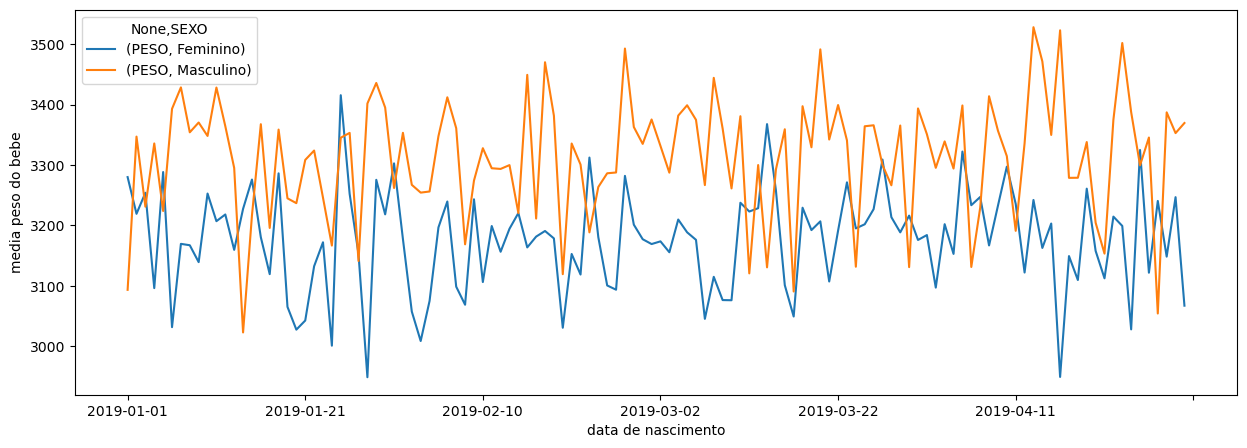

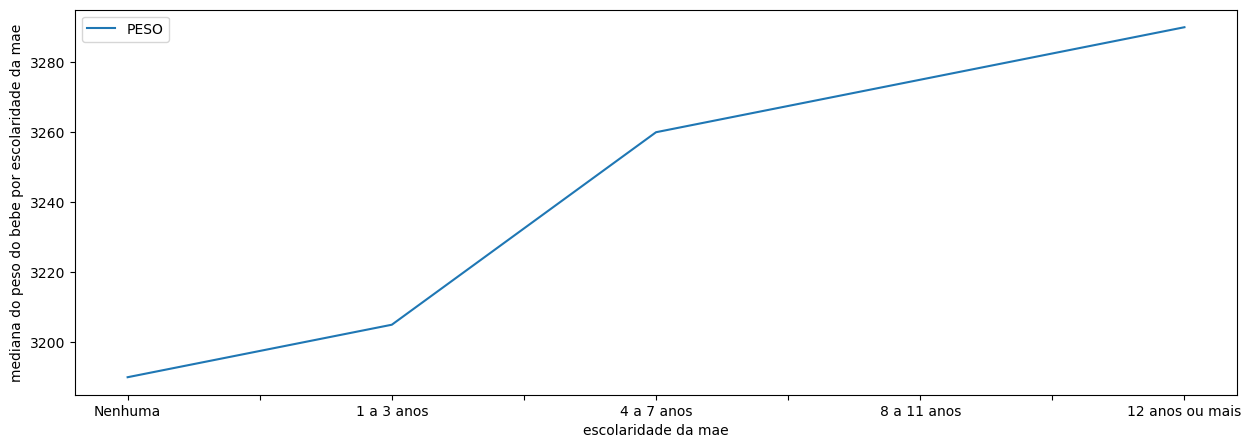

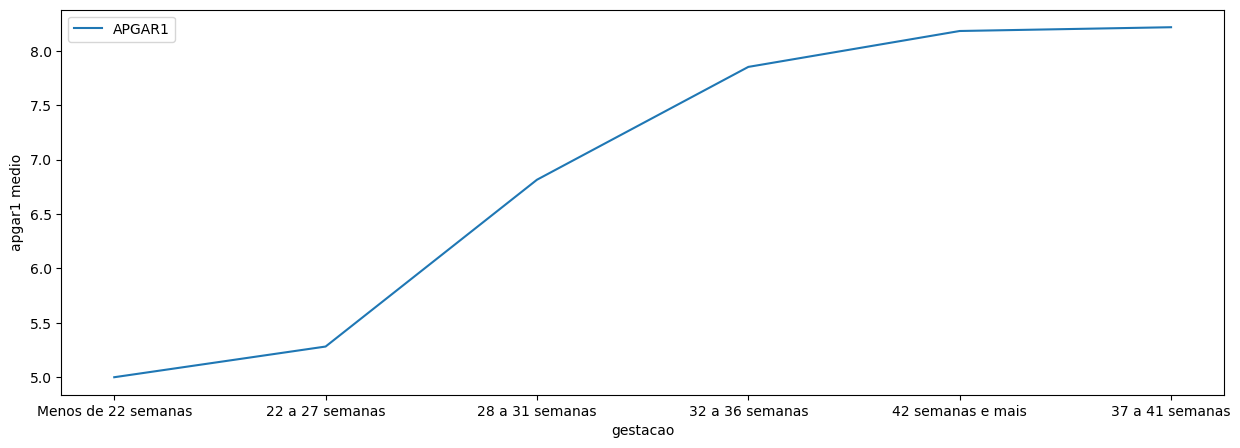

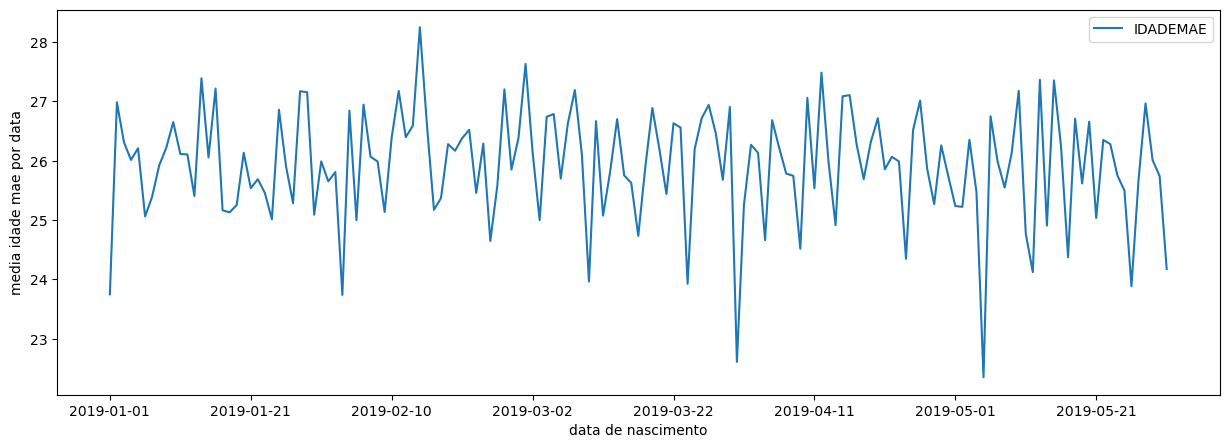

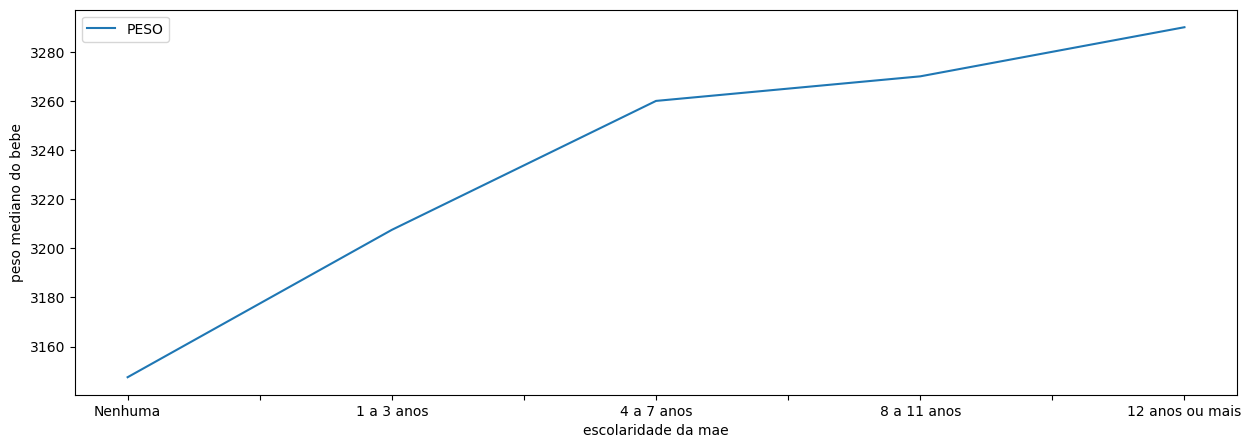

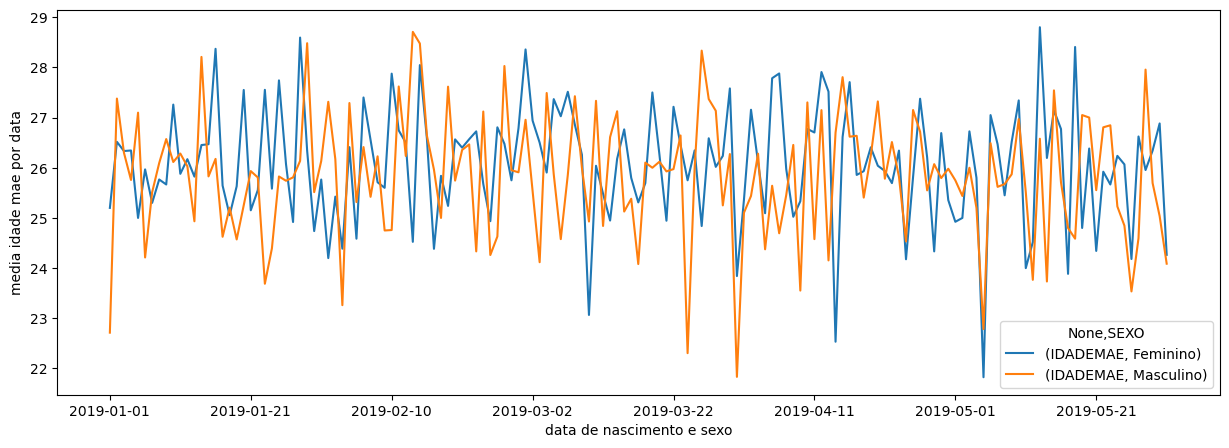

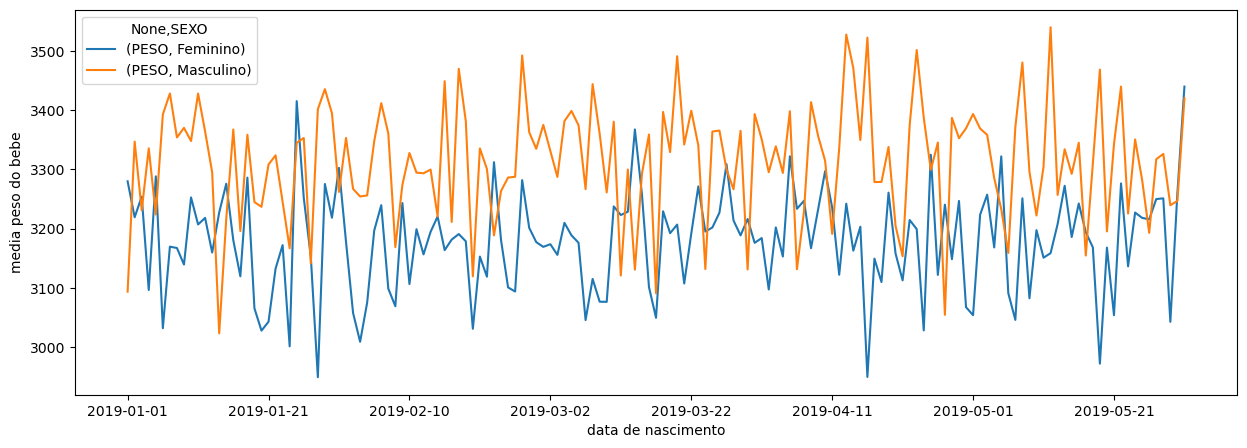

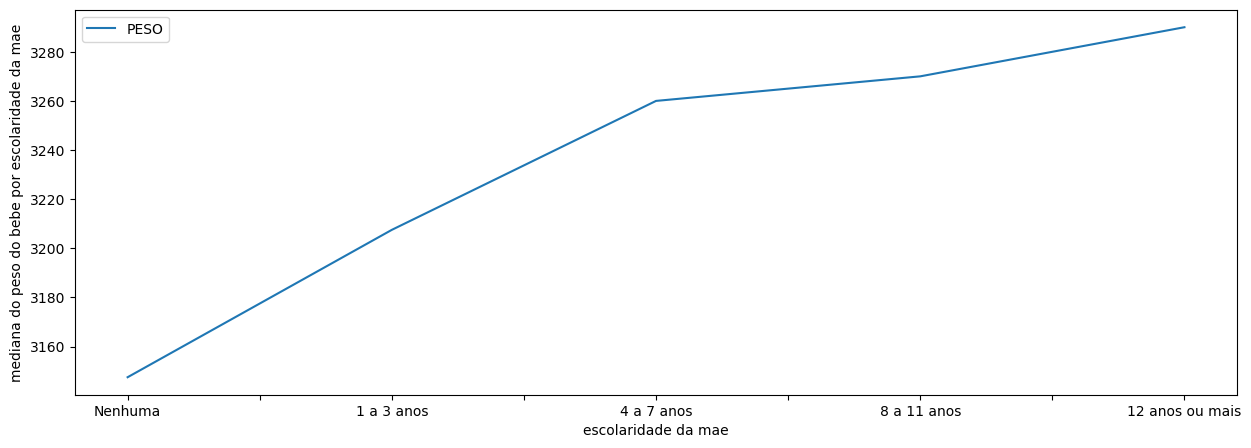

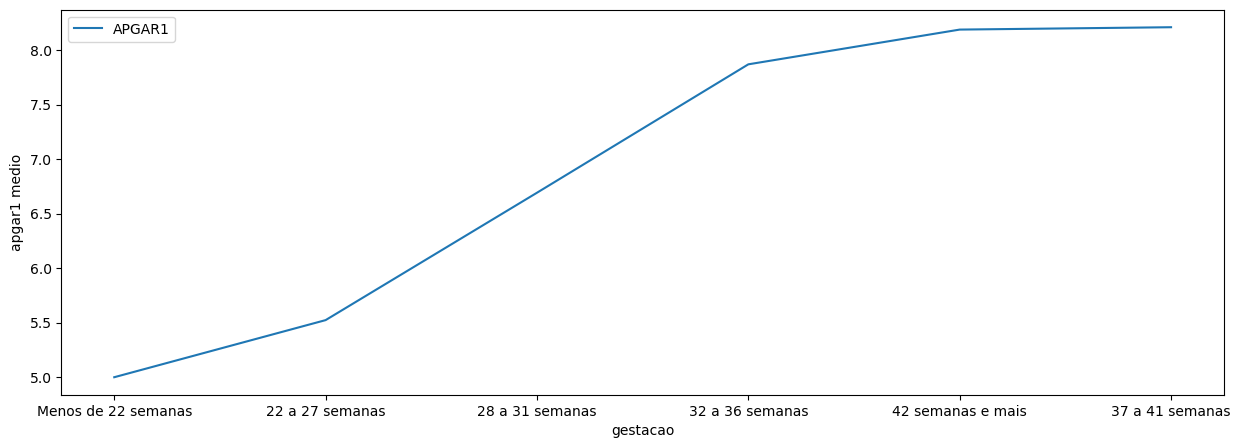

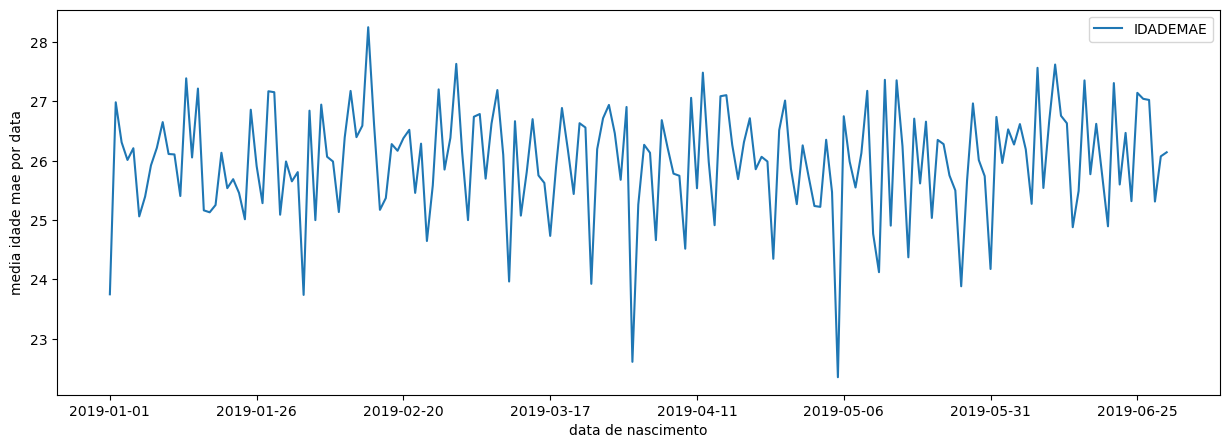

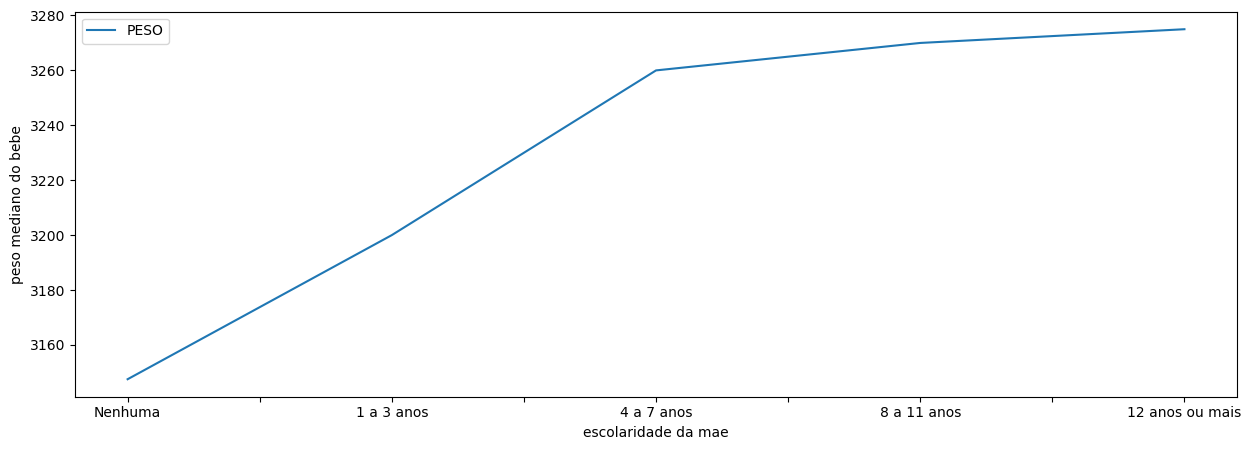

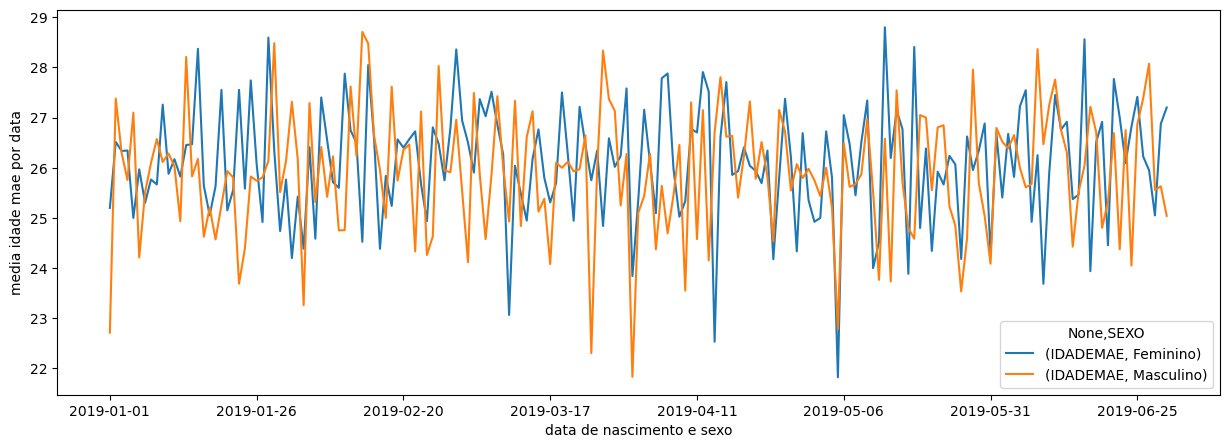

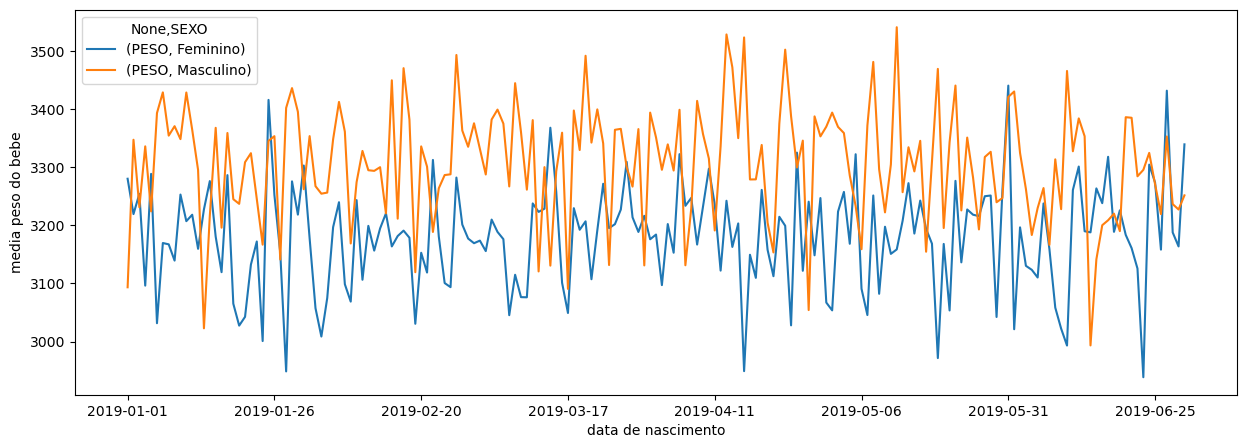

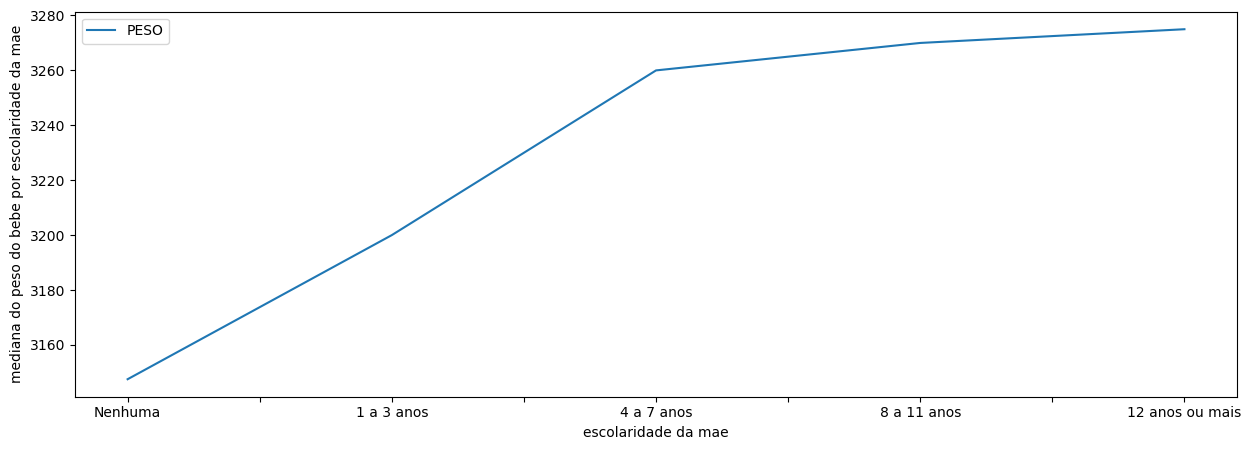

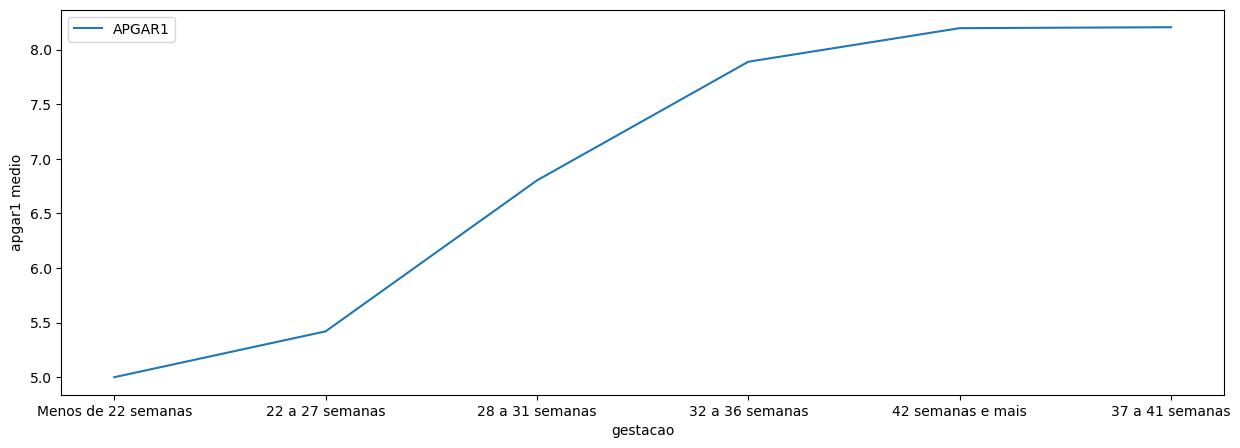

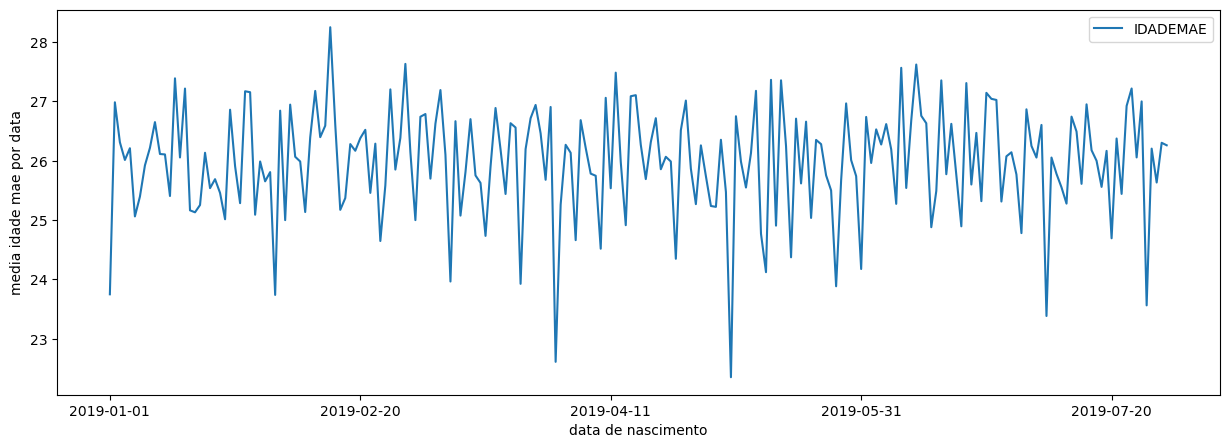

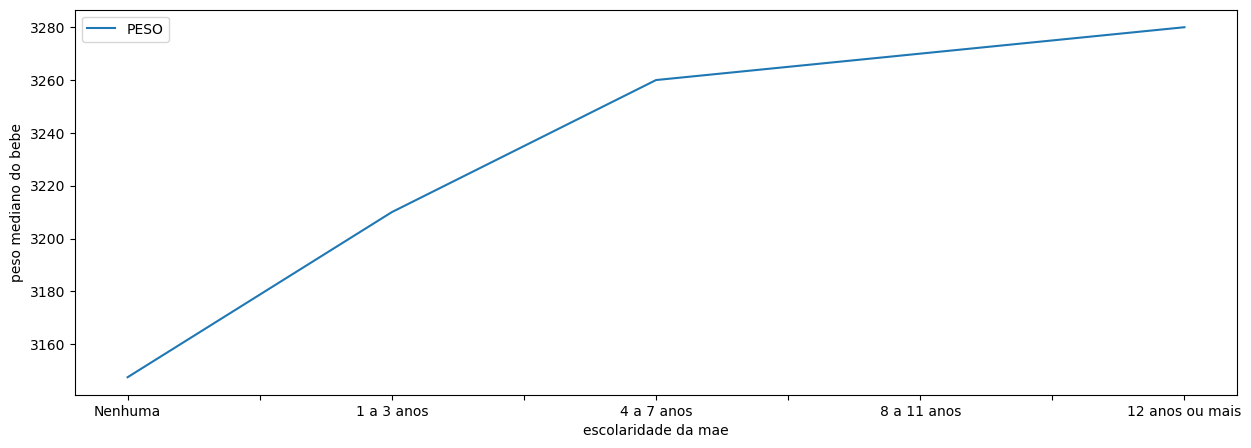

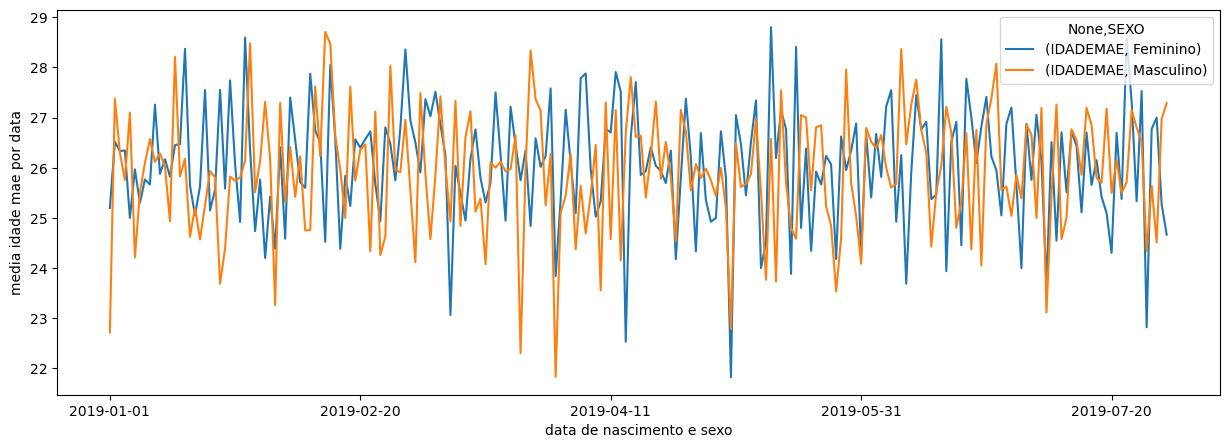

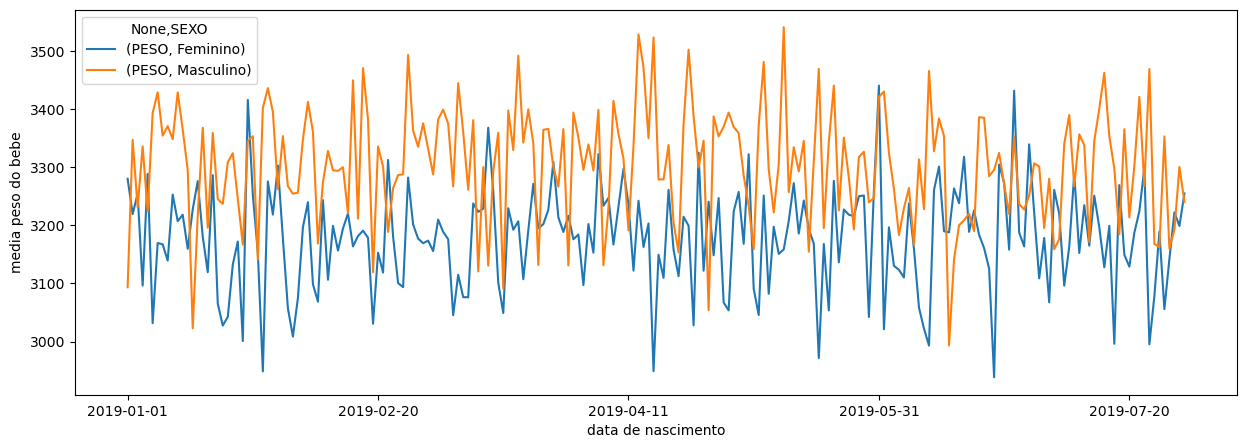

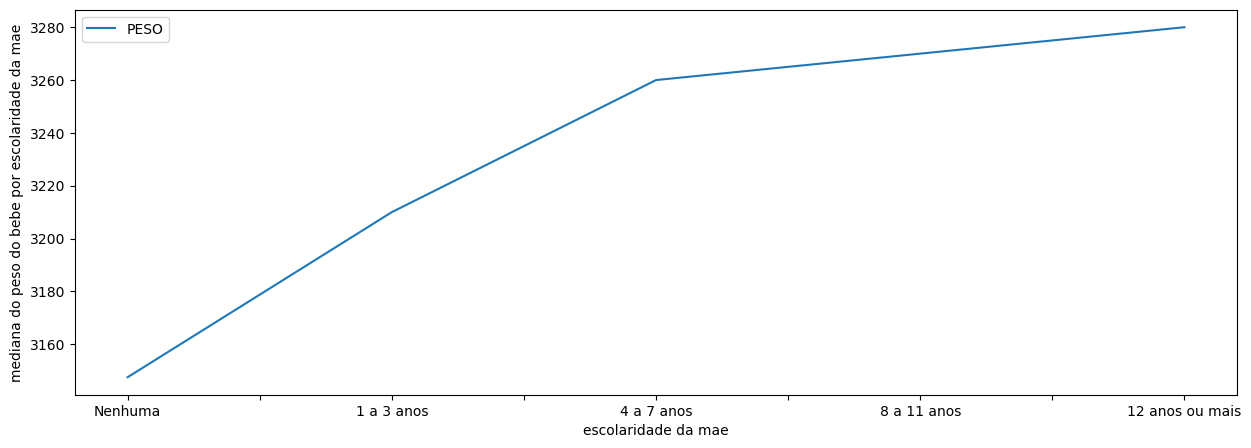

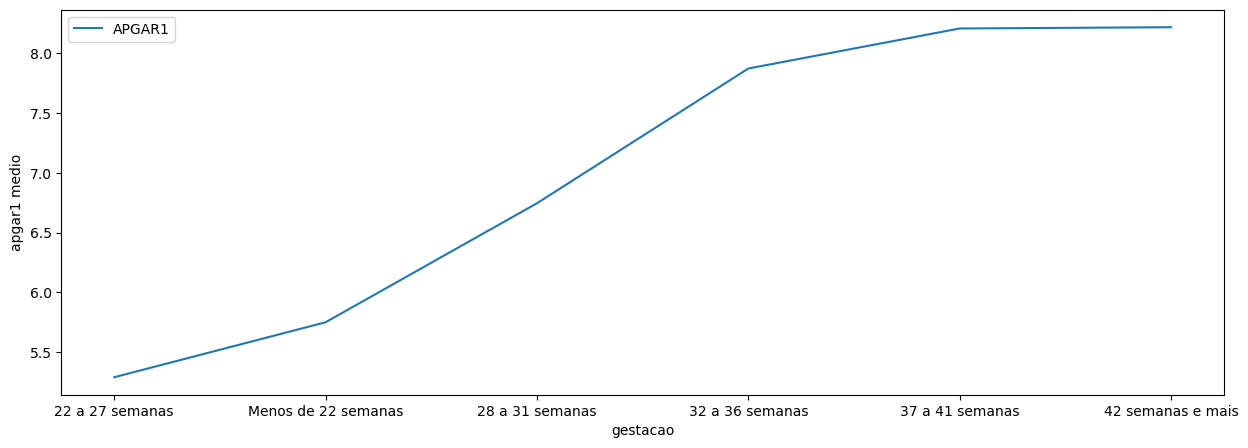

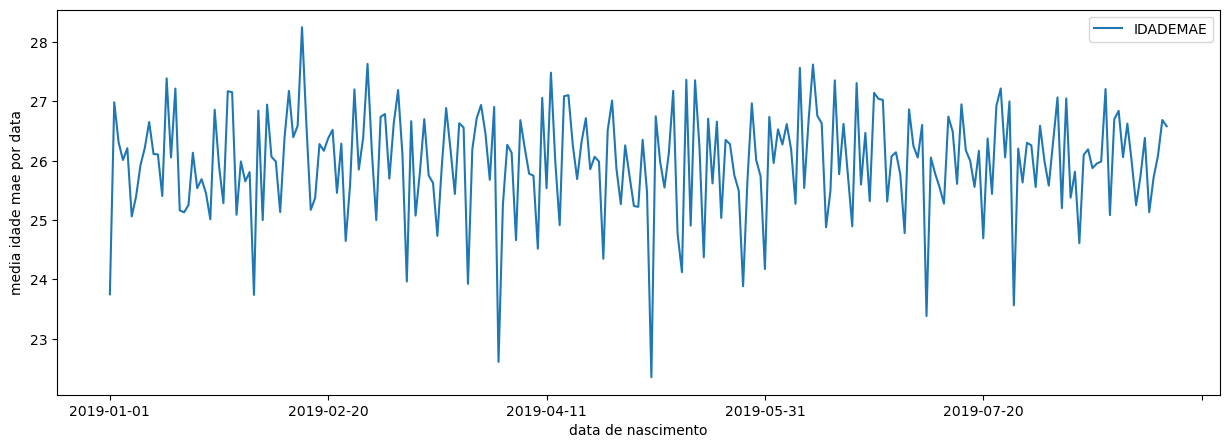

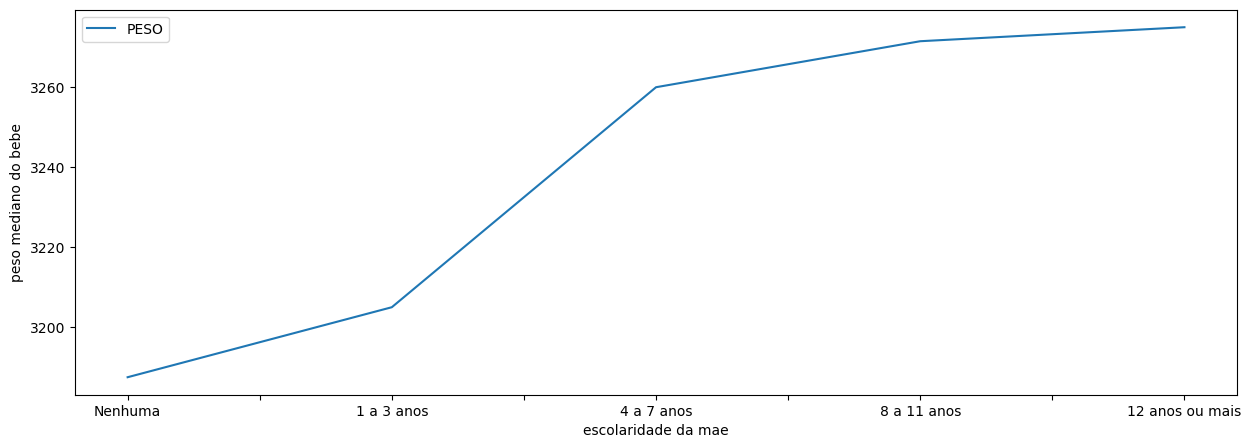

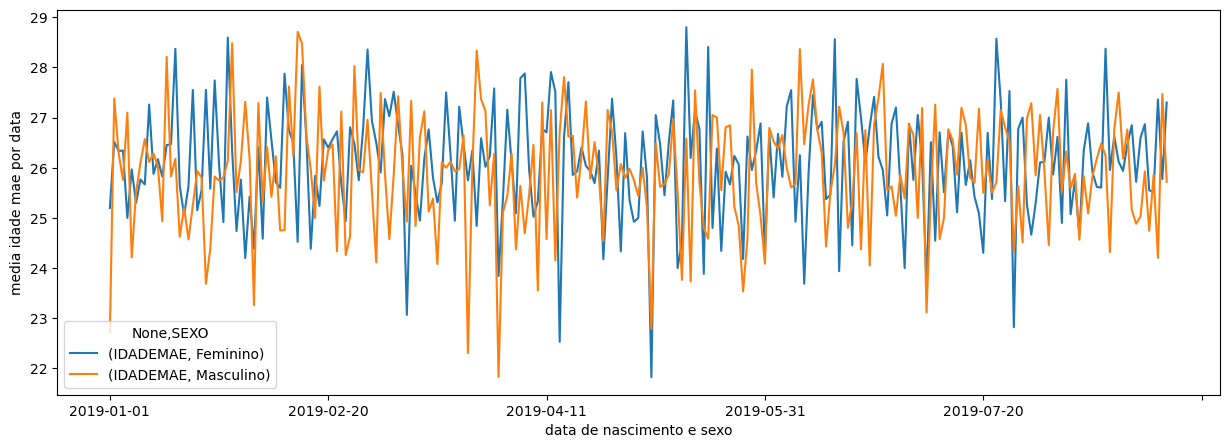

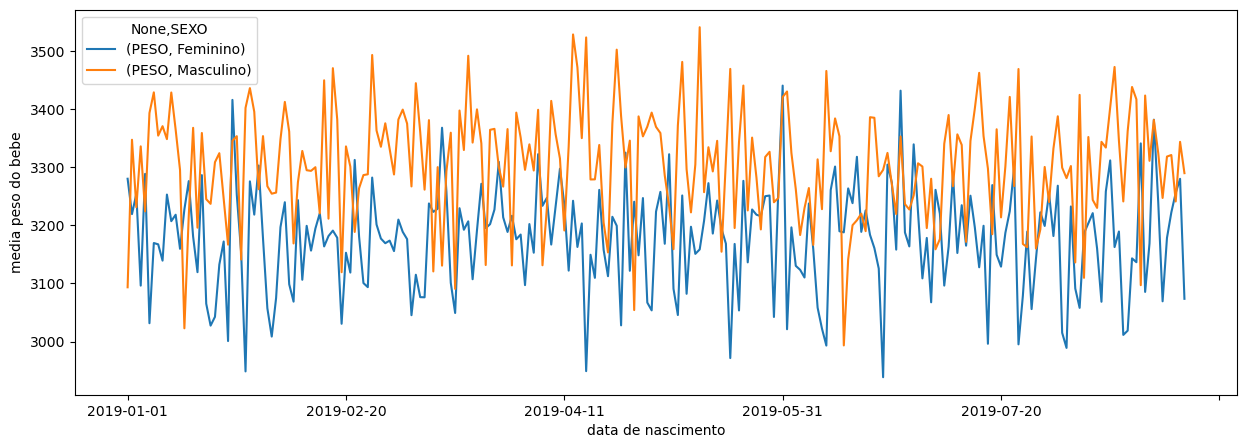

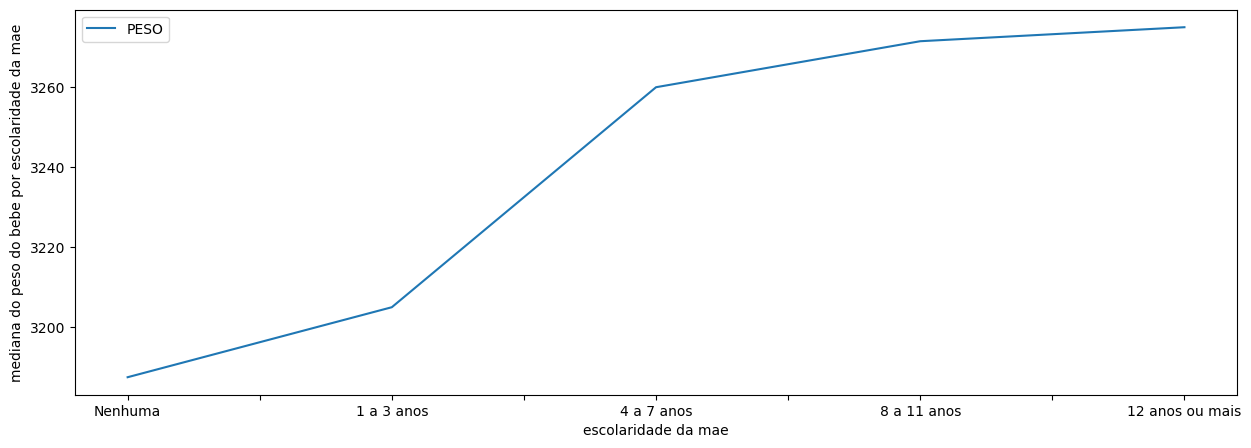

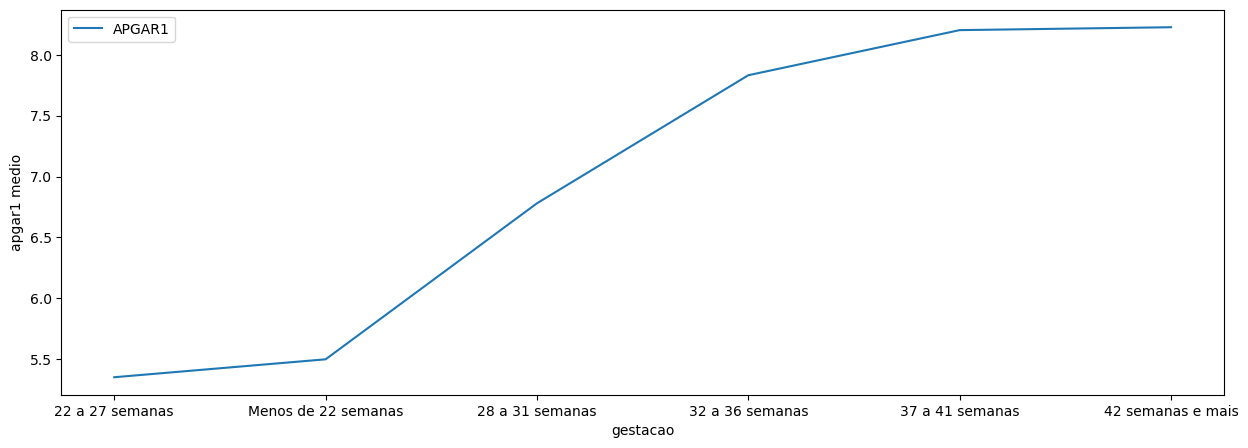

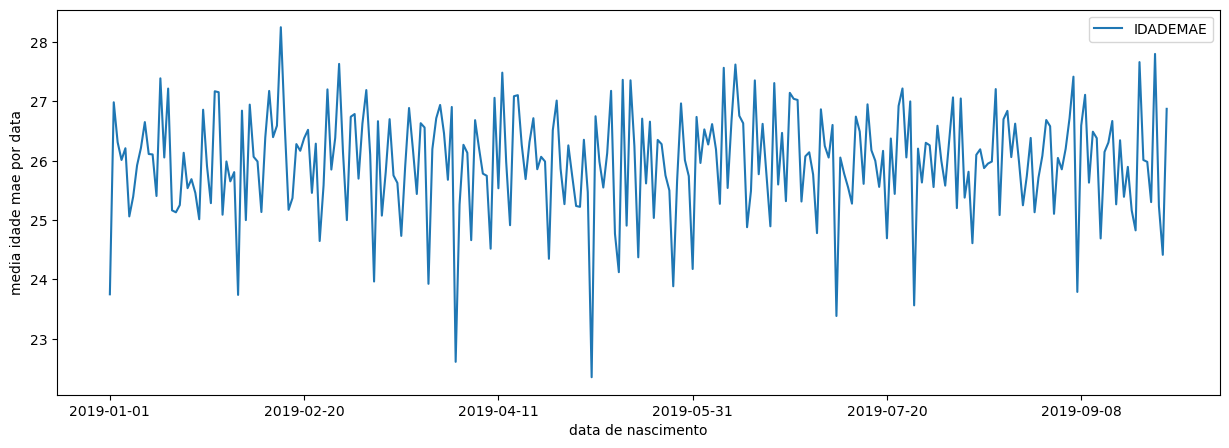

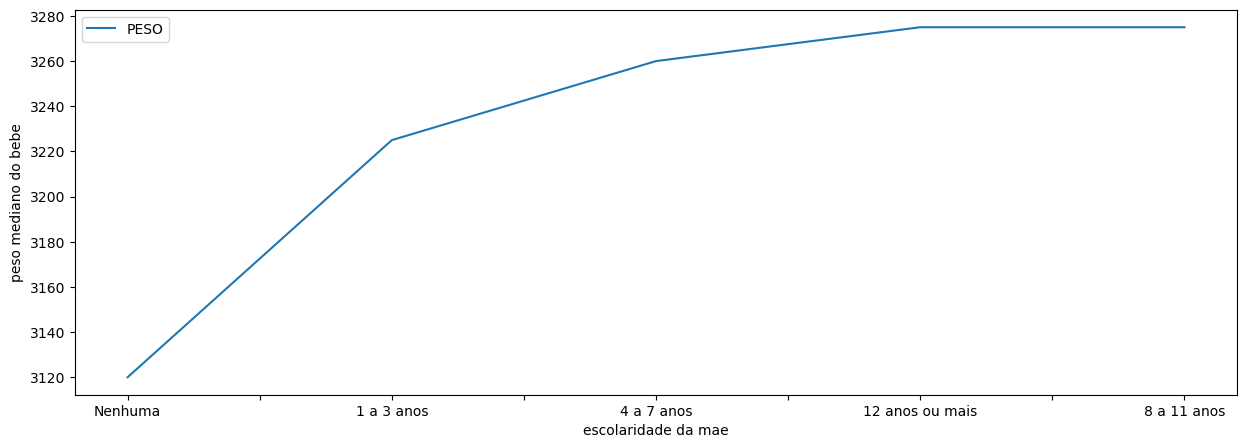

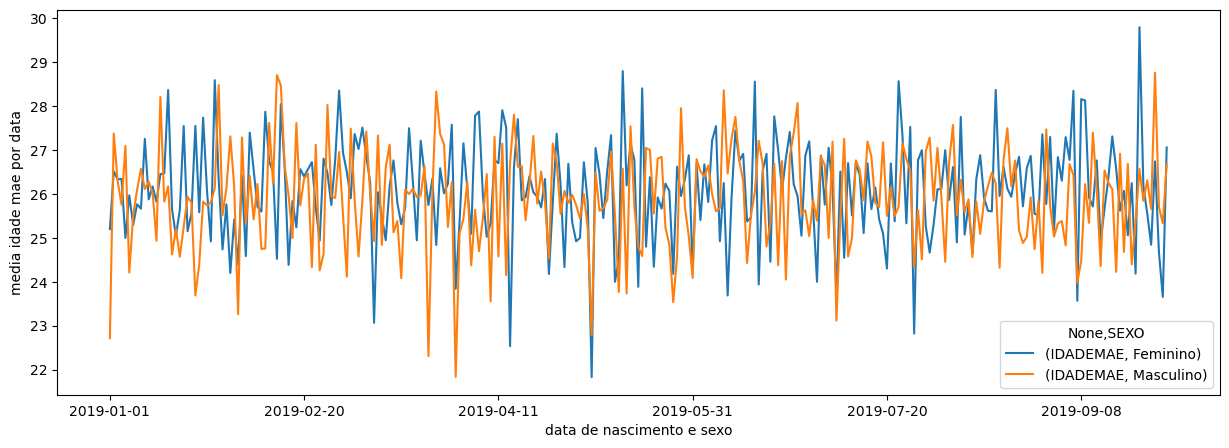

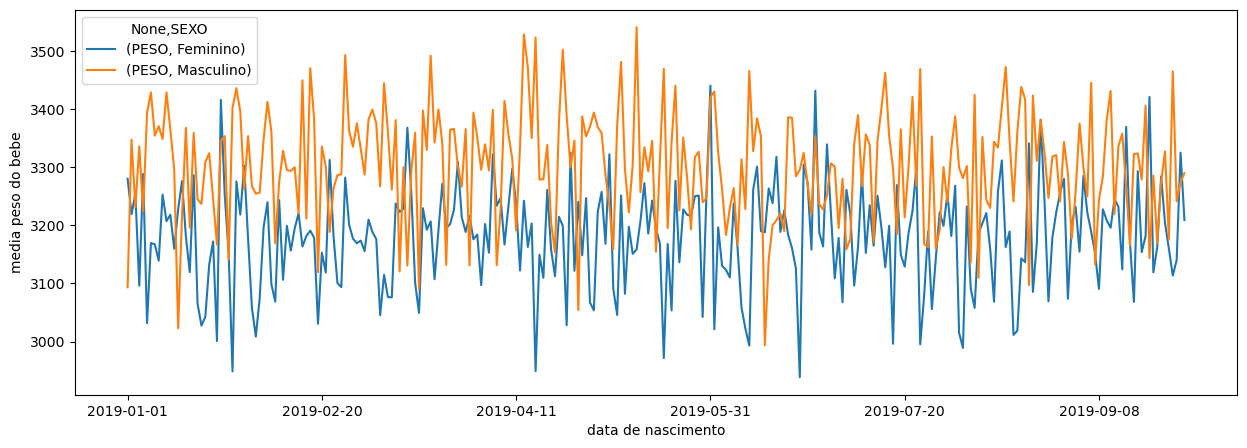

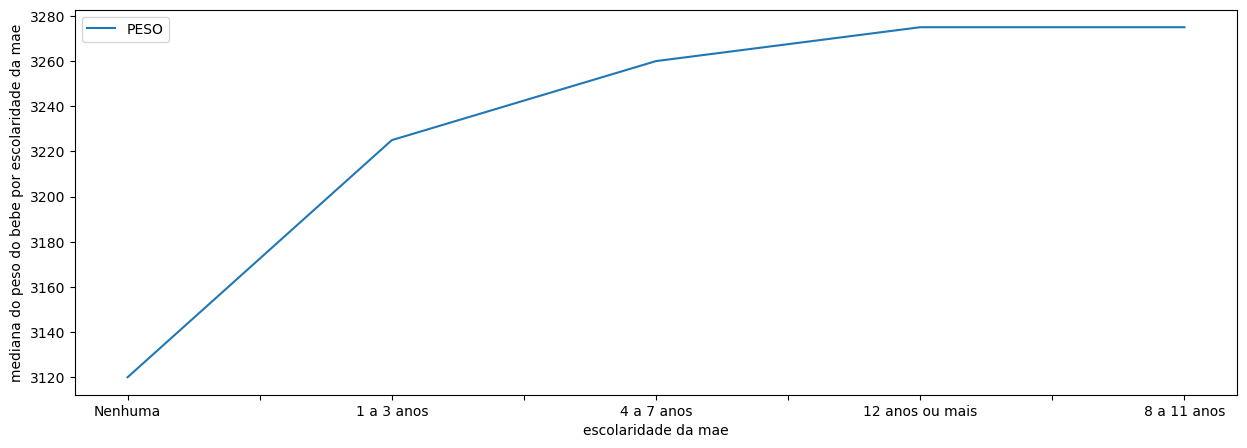

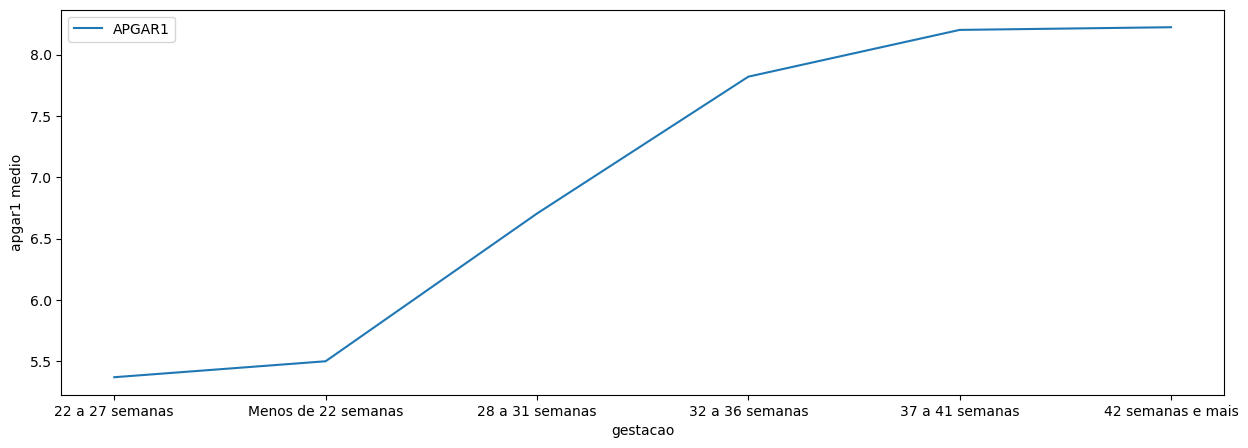

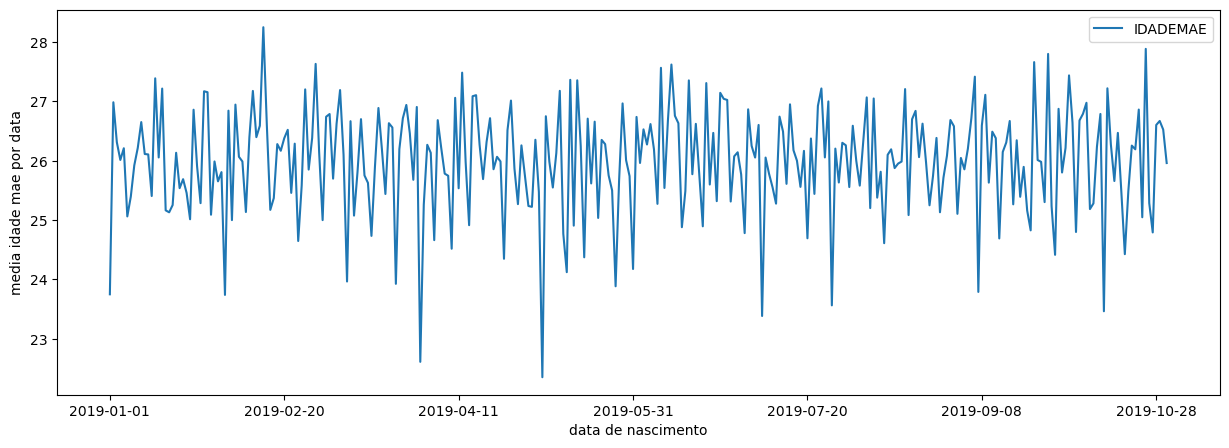

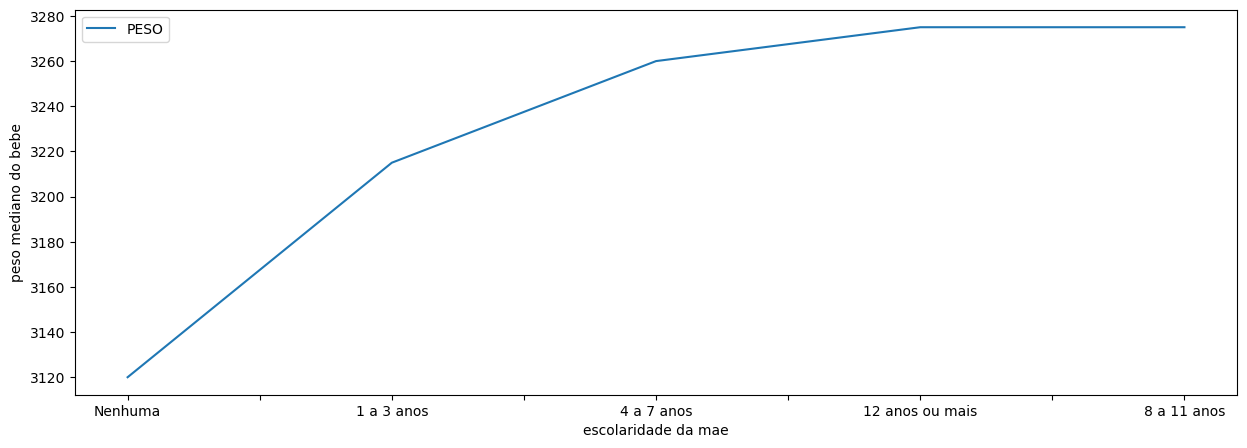

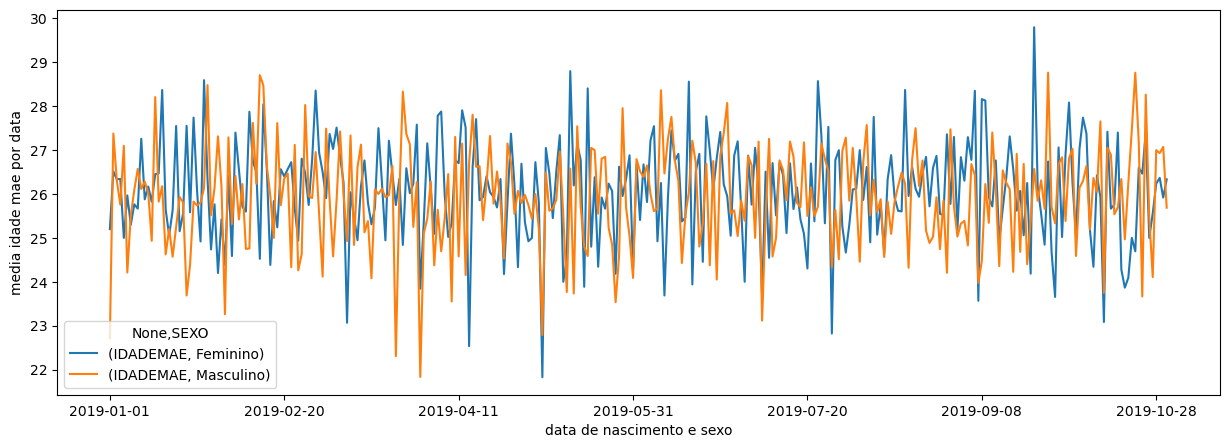

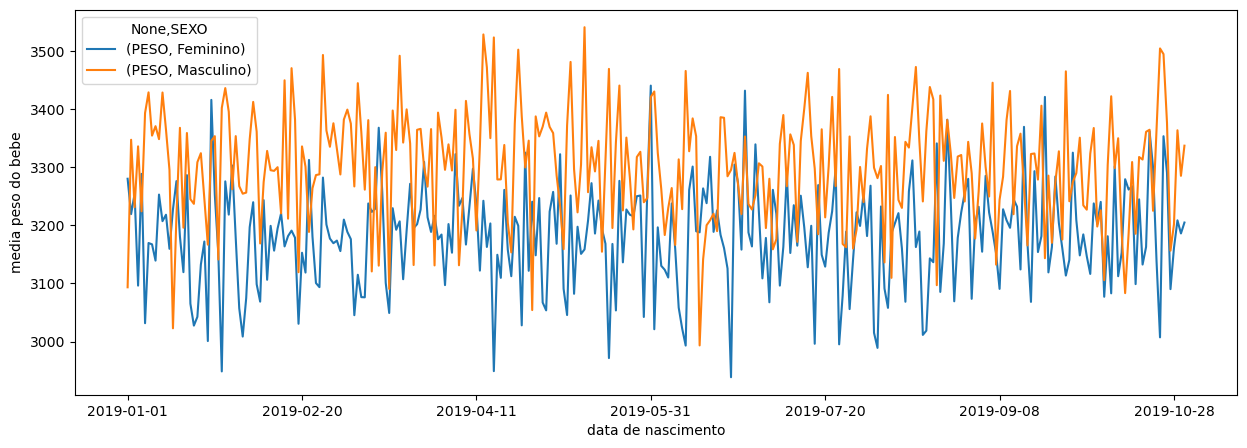

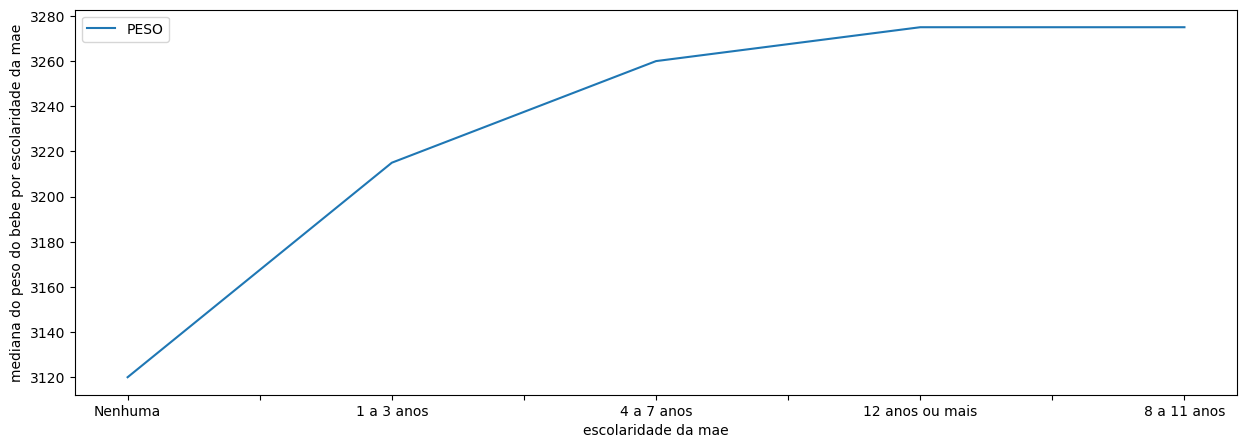

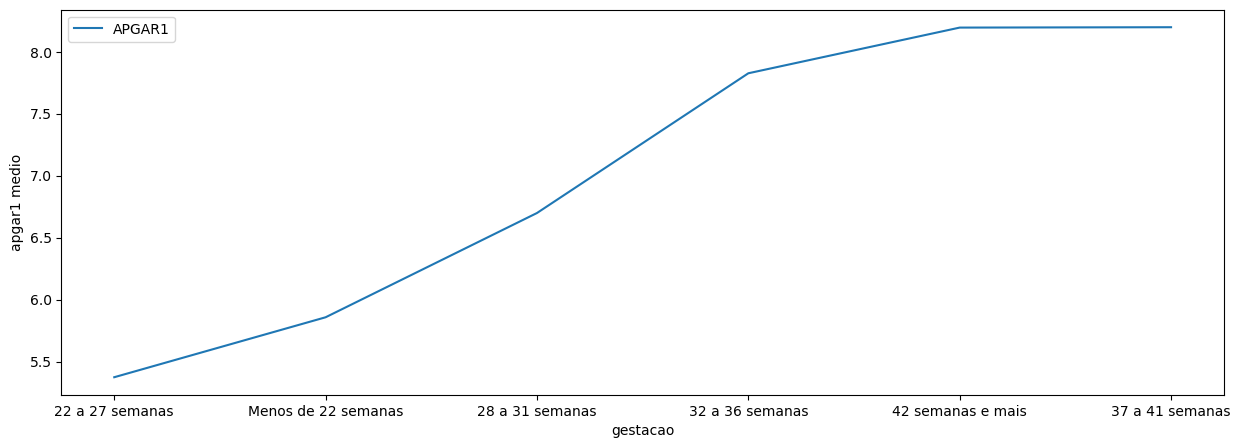

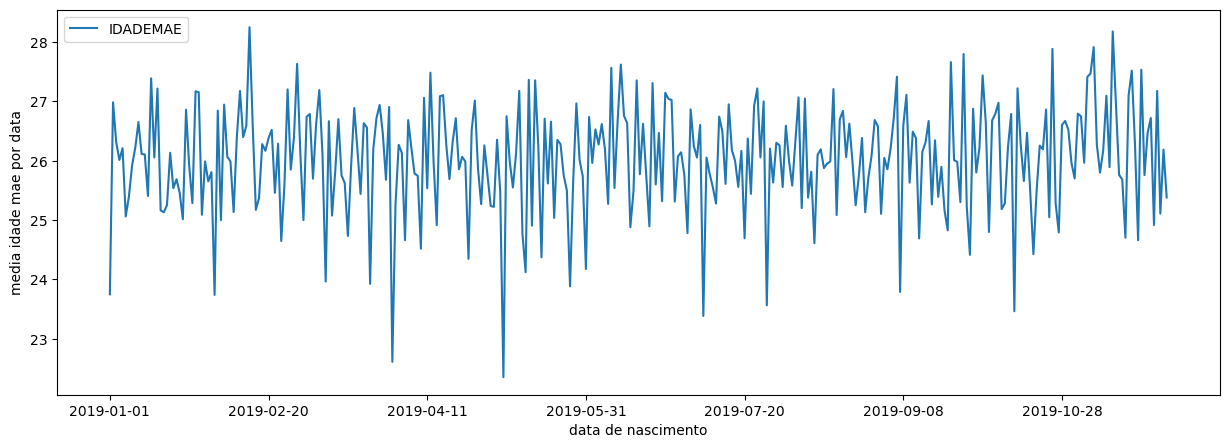

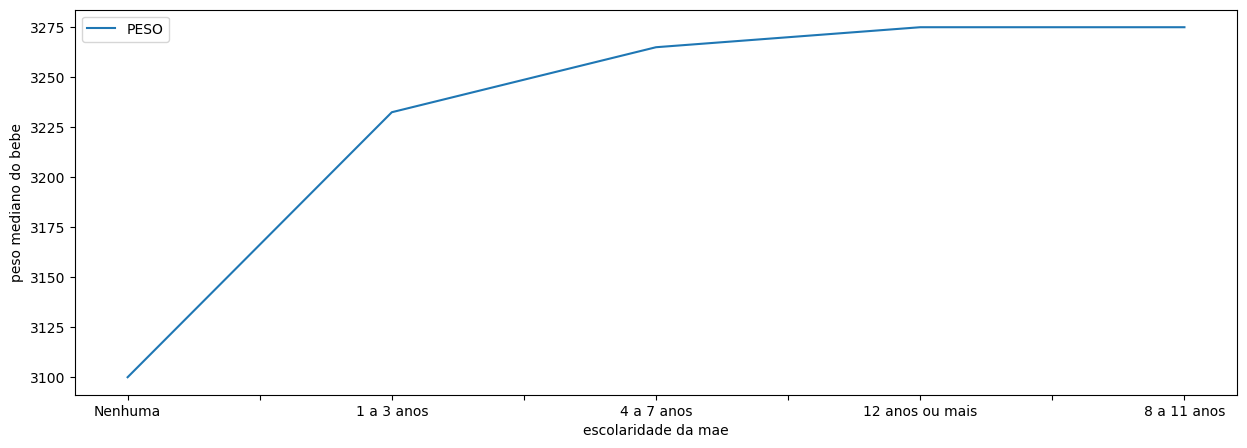

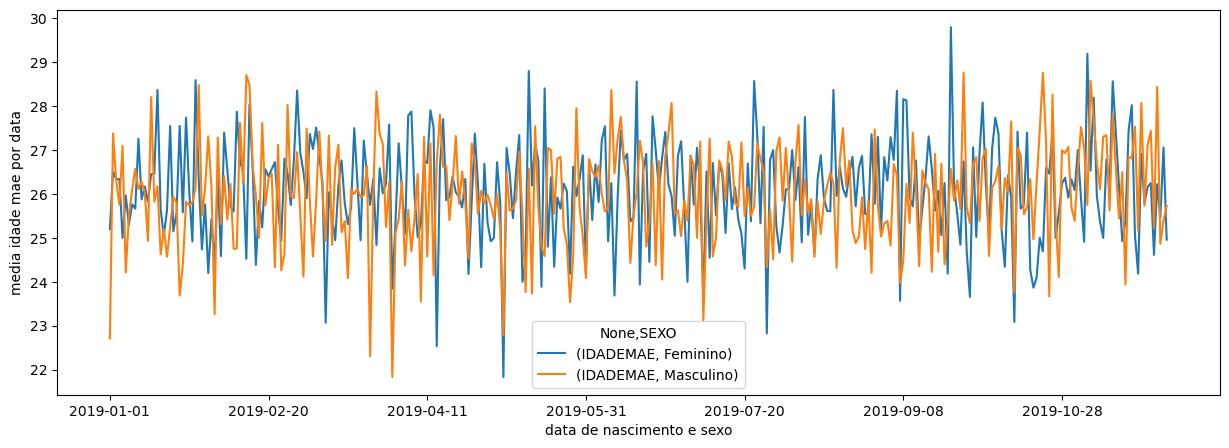

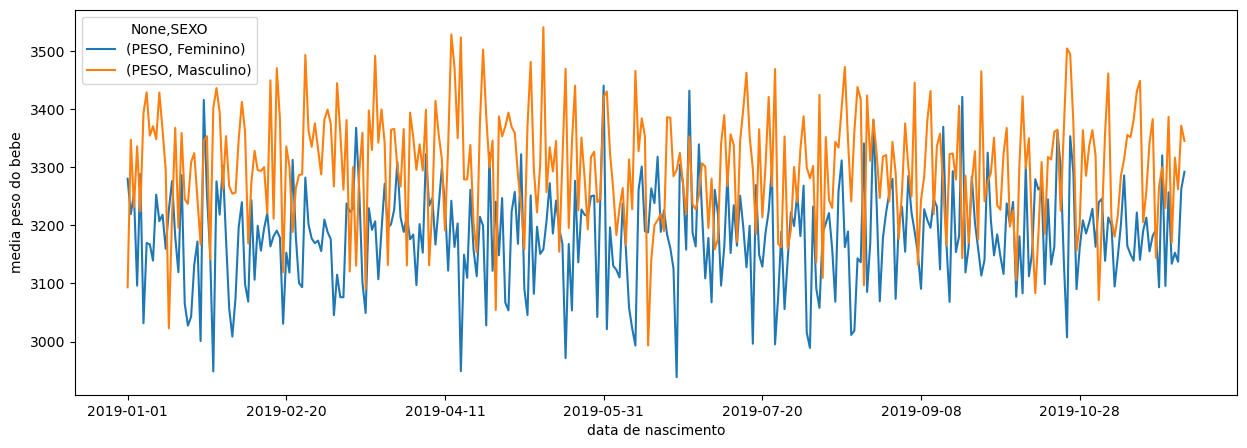

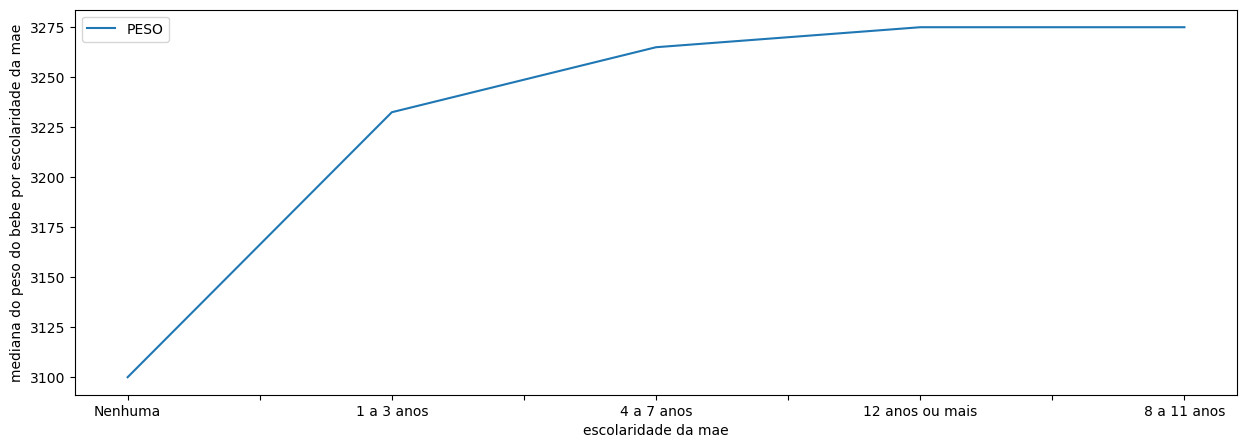

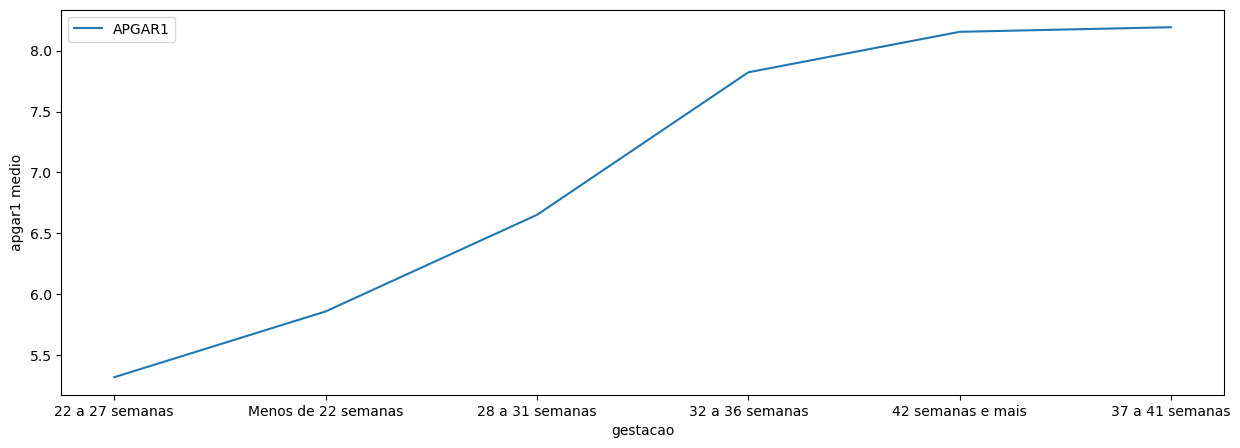

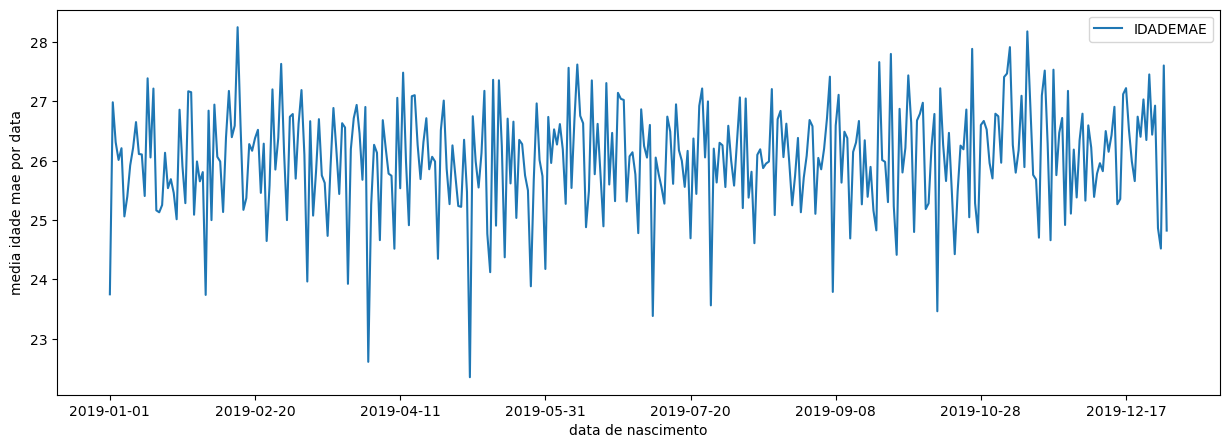

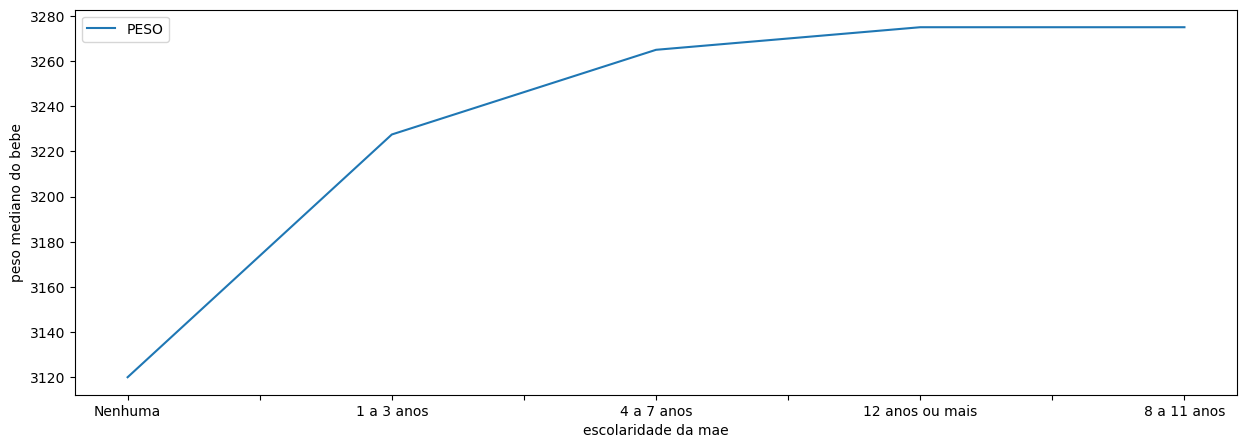

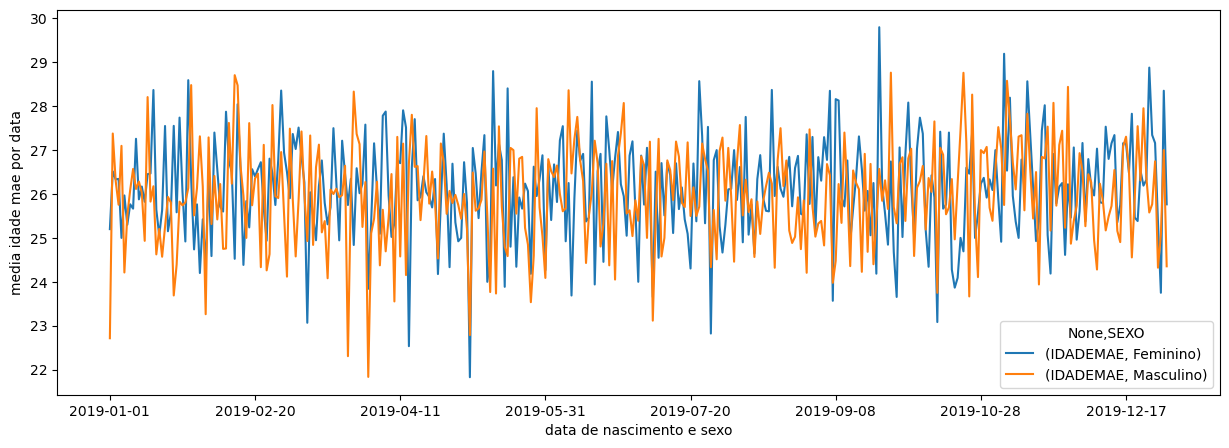

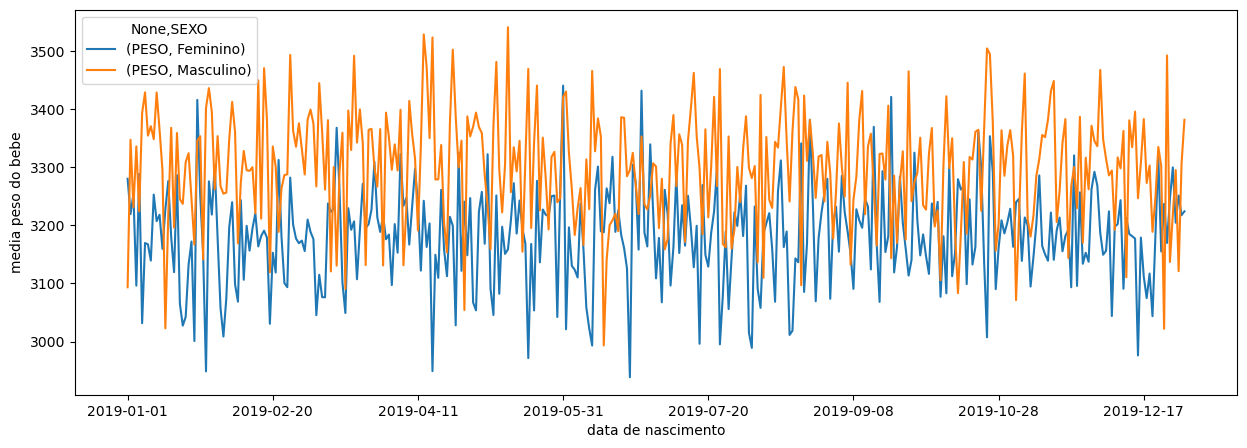

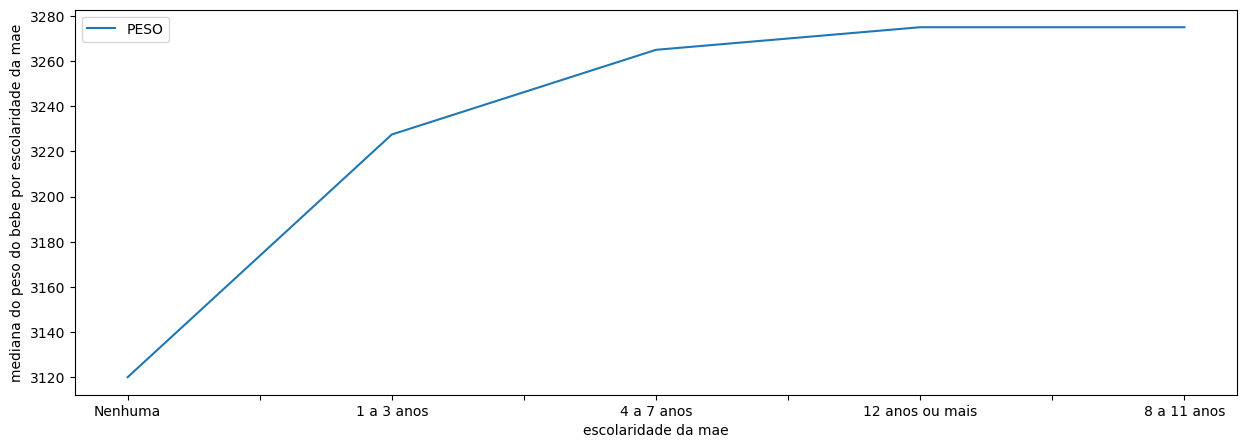

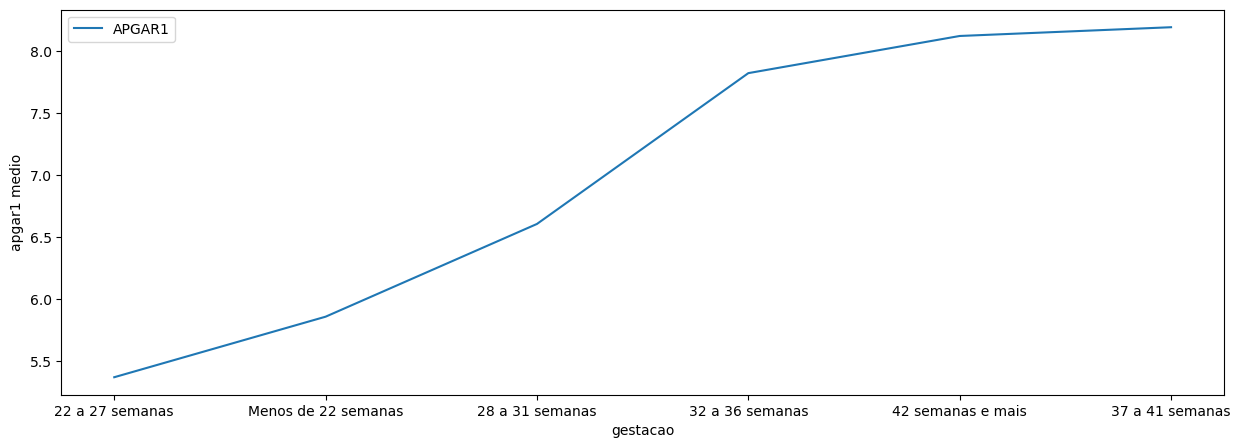

In [23]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def gerando_dados_mensais(df, value, index, func, ylabel, xlabel, opcao='nada'):

    if opcao == 'nada':
        pd.pivot_table(df, values=value, index=index, aggfunc=func).plot(figsize=[15,5])
    elif opcao == 'unstack':
        pd.pivot_table(df, values=value, index=index, aggfunc=func).unstack().plot(figsize=[15,5])
    elif opcao == 'sort':
        pd.pivot_table(df, values=value, index=index, aggfunc=func).sort_values(value).plot(figsize=[15,5])
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)

meses = ['JAN', 'FEV', 'MAR', 'ABR', 'MAI', 'JUN', 'JUL', 'AGO', 'SET', 'OUT', 'NOV', 'DEZ']

for mes in meses:

    df = pd.read_csv('SINASC_RO_2019_'+mes+'.csv')
    max_date = df.DTNASC.max()[:7]

    os.makedirs('./output/figs/'+max_date)

    gerando_dados_mensais(df, 'IDADEMAE', 'DTNASC', 'mean', 'media idade mae por data', 'data de nascimento')
    plt.savefig('./output/figs/'+max_date+'/media idade mae por data.png')

    gerando_dados_mensais(df, 'PESO', 'ESCMAE', 'median', 'peso mediano do bebe', 'escolaridade da mae', 'sort')
    plt.savefig('./output/figs/'+max_date+'/mediana peso bebe pela escolaridade da mae.png')

    gerando_dados_mensais(df, 'IDADEMAE', ['DTNASC', 'SEXO'], 'mean', 'media idade mae por data', 'data de nascimento e sexo', 'unstack')
    plt.savefig('./output/figs/'+max_date+'/media idade mae por data e sexo.png')

    gerando_dados_mensais(df, 'PESO', ['DTNASC', 'SEXO'], 'mean', 'media peso do bebe', 'data de nascimento', 'unstack')
    plt.savefig('./output/figs/'+max_date+'/media peso do bebe por data.png')

    gerando_dados_mensais(df, 'PESO', 'ESCMAE', 'median', 'mediana do peso do bebe por escolaridade da mae', 'escolaridade da mae', 'sort')
    plt.savefig('./output/figs/'+max_date+'/mediana do peso do bebe por escolaridade da mae.png')

    gerando_dados_mensais(df, 'APGAR1', 'GESTACAO', 'mean', 'apgar1 medio', 'gestacao', 'sort')
    plt.savefig('./output/figs/'+max_date+'/apgar1 medio por gestacao.png')
    

### Questão 2

Acredito que uma função que criasse todos os graficos, por mais que um loop for ajude muito, facilitaria para os estudos dos meses futuros.